# Section 1: Study of the dataset

## Packages required


In [24]:
%pip install --upgrade pyod
%pip install xgboost
%pip install seaborn
%pip install umap-learn




[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Import the dataset and preprocessing

### Import and cleaning

In [13]:
import pandas as pd

# Specify the file path
file_path = 'data/mnist.csv'

# Read the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,p01,p02,p03,p04,p05,p06,p07,p08,p09,p10,...,p142,p143,p144,p145,p146,p147,p148,p149,p150,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,197,0,0,1
1,0,0,0,0,245,0,0,0,0,0,...,0,0,0,0,0,0,253,0,0,0
2,0,0,0,0,234,0,45,0,0,10,...,0,0,0,0,0,0,253,253,202,0
3,0,0,0,0,0,0,17,0,0,143,...,0,0,0,0,0,0,0,0,201,0
4,0,0,0,0,254,0,15,0,0,98,...,0,0,0,0,0,0,0,0,93,0


In [14]:
all_zero_columns = df.columns[df.eq(0).all()]
print(all_zero_columns.size)

43


In [15]:
# Drop the columns with all zeros
df = df.drop(all_zero_columns, axis=1)

# Save the cleaned dataset to a new file
cleaned_file_path = 'data/mnist_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)


## cleaned dataset upload

In [3]:
import pandas as pd

# Specify the file path
cleaned_file_path = 'data/mnist_cleaned.csv'

# Read the cleaned dataset into a pandas DataFrame
df_cleaned = pd.read_csv(cleaned_file_path)

# Display the first few rows of the cleaned DataFrame
df_cleaned.head()

# check for columns with the same value
same_value_columns = df_cleaned.columns[df_cleaned.nunique() == 1]
print(same_value_columns.size)

# split in to features and labels
df_cleaned_features = df_cleaned.iloc[:, :-1]
df_cleaned_labels = df_cleaned.iloc[:, -1]

0


### Further cleaning

In the following i have explored how many columns have more than 5450 zeros, maybe it could a good idea drop these columns and for that reason there is the df_double_cleaned_features.

In [39]:
df_cleaned_features.stack().value_counts(normalize=True)

0      0.688218
253    0.065332
252    0.024836
254    0.019184
255    0.011502
         ...   
153    0.000416
69     0.000365
87     0.000364
124    0.000360
90     0.000353
Name: proportion, Length: 256, dtype: float64


In [55]:
frequences = df_cleaned_features.apply(pd.Series.value_counts)

columns_greater_5450 = frequences.columns[(frequences.iloc[0] > 5450)]
num_columns_greater_5450 = len(columns_greater_5450)
print(f"There are {num_columns_greater_5450} columns with a number greater than 5450 at position 0:")
print(columns_greater_5450)

# Drop the columns with a number greater than 5450 at position 0
df_double_cleaned_features = df_cleaned_features.drop(columns_greater_5450, axis=1)

There are 30 columns with a number greater than 5450 at position 0:
Index(['p01', 'p16', 'p17', 'p20', 'p23', 'p29', 'p31', 'p41', 'p42', 'p43',
       'p54', 'p63', 'p75', 'p77', 'p78', 'p80', 'p91', 'p95', 'p96', 'p100',
       'p101', 'p103', 'p105', 'p110', 'p119', 'p127', 'p128', 'p130', 'p138',
       'p146'],
      dtype='object')


## Data visualization

### PCA

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Do a PCA in 2d and 3d and then plot the projection of the dataset.

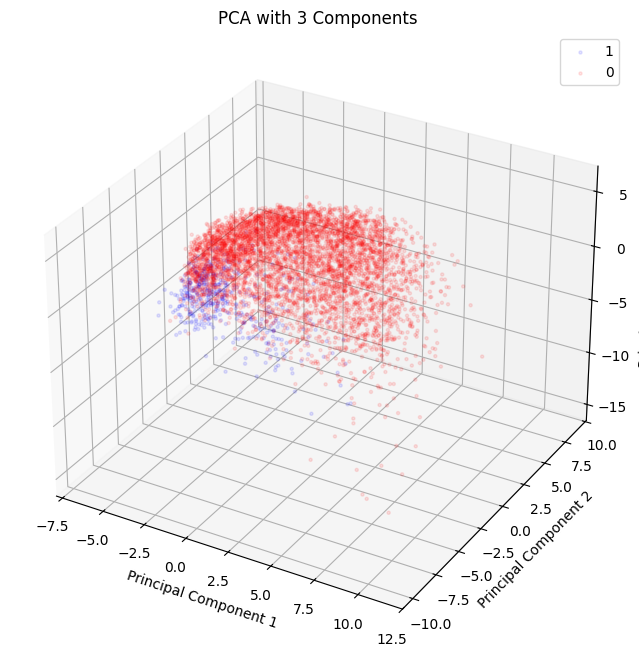

In [20]:
# Standardize the features
scaler = StandardScaler()
df_cleaned_features_scaled = scaler.fit_transform(df_cleaned_features)

# Perform PCA to reduce the dimensionality to 3 dimensions
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_cleaned_features_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Concatenate with the labels
df_pca = pd.concat([df_pca, df_cleaned_labels], axis=1)

# Plot PCA results with different colors for different classes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
for label, color in zip(df_pca['class'].unique(), ['blue', 'red']):
    ax.scatter(df_pca.loc[df_pca['class'] == label, 'PC1'],
               df_pca.loc[df_pca['class'] == label, 'PC2'],
               df_pca.loc[df_pca['class'] == label, 'PC3'],
               c=color, label=label, alpha=0.1, marker='.')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA with 3 Components')
ax.legend()

plt.show()

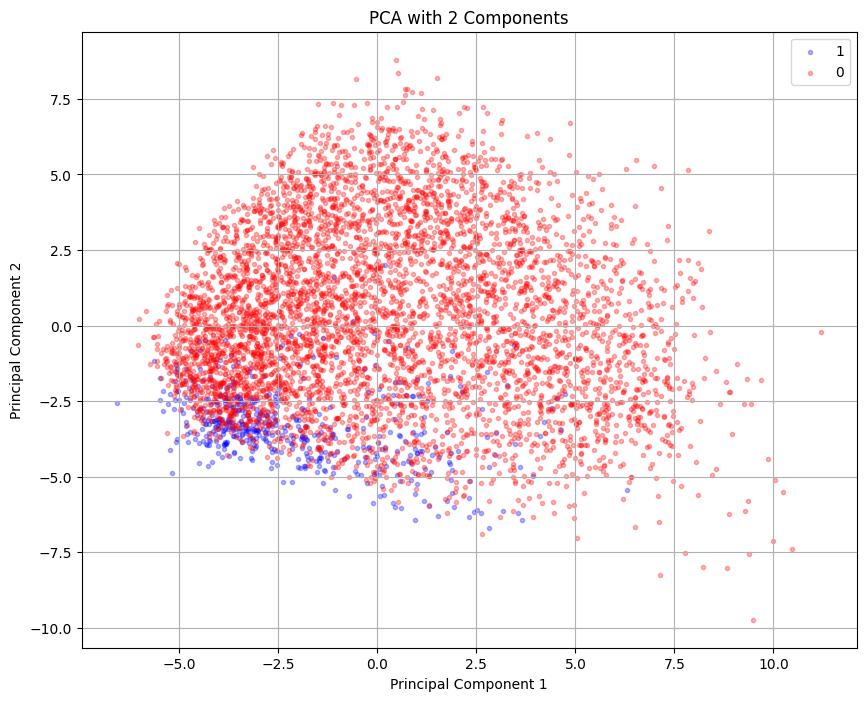

In [21]:
# Standardize the features (important for PCA)
scaler = StandardScaler()
df_cleaned_features_scaled = scaler.fit_transform(df_cleaned_features)

# Perform PCA to reduce the dimensionality to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_cleaned_features_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate with the labels
df_pca = pd.concat([df_pca, df_cleaned_labels], axis=1)

# Plot PCA results with different colors for different classes
plt.figure(figsize=(10, 8))

# Scatter plot
for label, color in zip(df_pca['class'].unique(), ['blue', 'red']):
    plt.scatter(df_pca.loc[df_pca['class'] == label, 'PC1'],
                df_pca.loc[df_pca['class'] == label, 'PC2'],
                c=color, label=label, alpha=0.3, marker='.')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with 2 Components')
plt.legend()
plt.grid(True)
plt.show()


### tSNE

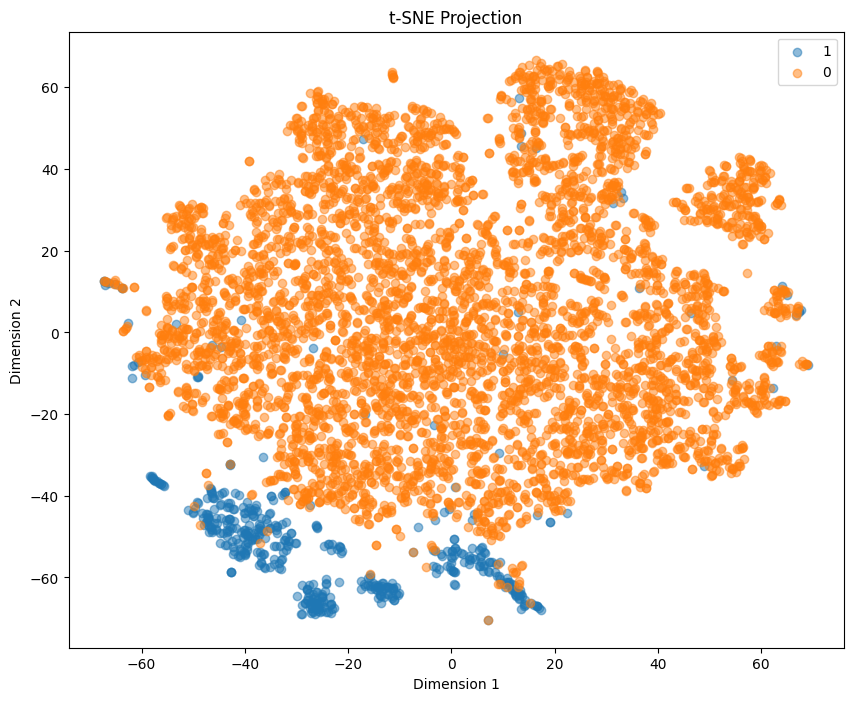

In [23]:
from sklearn.manifold import TSNE

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_cleaned_features)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_components = tsne.fit_transform(features_scaled)
tsne_df = pd.DataFrame(data = tsne_components, columns=['Dim1', 'Dim2'])
tsne_df = pd.concat([tsne_df, df_cleaned_labels], axis=1)

# Plot
plt.figure(figsize=(10, 8))
for label in tsne_df['class'].unique():
    subset = tsne_df[tsne_df['class'] == label]
    plt.scatter(subset['Dim1'], subset['Dim2'], label=label, alpha=0.5)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Projection')
plt.legend()
plt.show()


### UMAP

   p01  p03  p05  p07  p09  p10  p12  p14  p15  p16  ...  p136  p137  p138  \
0    0    0    0    0    0    0    0  139    0    0  ...   254     0     0   
1    0    0  245    0    0    0  207   54    0    0  ...   240     0     0   
2    0    0  234   45    0   10  253  176    0    0  ...   253   254     0   
3    0    0    0   17    0  143    0  210    0    0  ...   172     0     0   
4    0    0  254   15    0   98   19   28    0    0  ...     0     0     0   

   p141  p144  p146  p148  p149  p150  class  
0   160     0     0   197     0     0      1  
1   248     0     0   253     0     0      0  
2    94     0     0   253   253   202      0  
3     0     0     0     0     0   201      0  
4     0     0     0     0     0    93      0  

[5 rows x 108 columns]
Columns with the same value: 0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


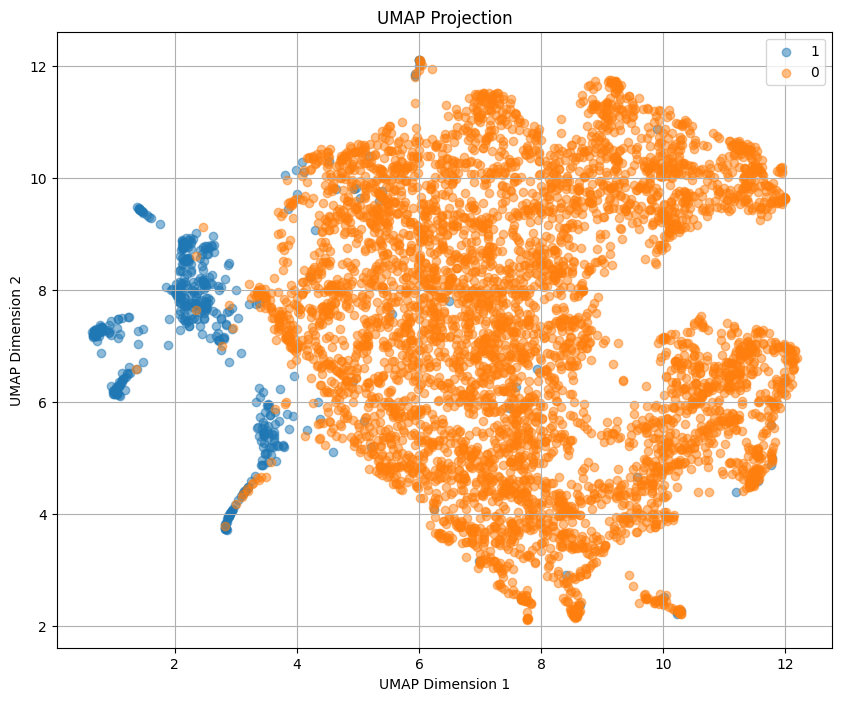

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import umap
import numpy as np

# Standardize the features (important for UMAP)
scaler = StandardScaler()
df_cleaned_features_scaled = scaler.fit_transform(df_cleaned_features)

# Perform UMAP to reduce the dimensionality to 2 dimensions
reducer = umap.UMAP(n_components=2, random_state=42)
umap_embedding = reducer.fit_transform(df_cleaned_features_scaled)

# Ensure the UMAP embedding is of type float64
umap_embedding = umap_embedding.astype(np.float64)

# Create a DataFrame with the UMAP results
df_umap = pd.DataFrame(data=umap_embedding, columns=['Dim1', 'Dim2'])

# Concatenate with the labels
df_umap = pd.concat([df_umap, df_cleaned_labels], axis=1)

# Plot UMAP results with different colors for different classes
plt.figure(figsize=(10, 8))
for label in df_umap['class'].unique():
    subset = df_umap[df_umap['class'] == label]
    plt.scatter(subset['Dim1'], subset['Dim2'], label=label, alpha=0.5)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Projection')
plt.legend()
plt.grid(True)
plt.show()

### Correlation matrix

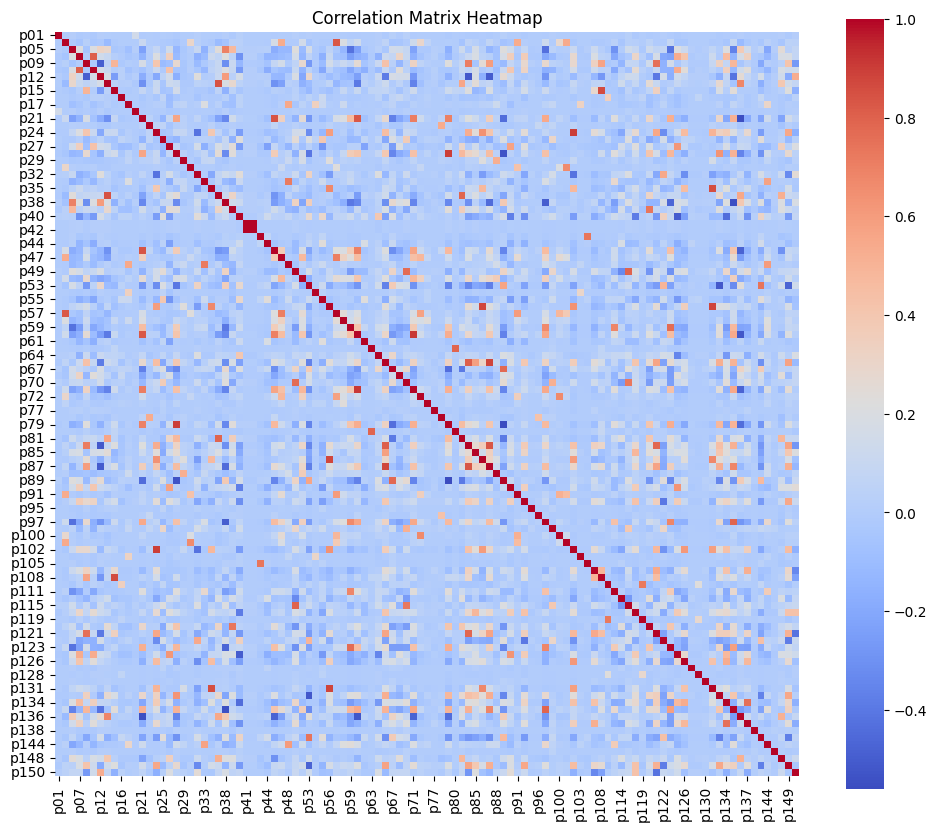

In [9]:
# Calculate the correlation matrix
corr_matrix = df_cleaned_features.corr()

# Plot as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Unsupervised algorithms


## ABOD

In [7]:
data_abod = df_cleaned_features
labels_abod = df_cleaned_labels

# Import the ABOD class
from pyod.models.abod import ABOD
from sklearn.metrics import classification_report
import numpy as np

# Initialize the FastABOD model
model_fast_abod = ABOD(contamination=1/11, method='fast', n_neighbors=20)

# Convert to numpy array with float64 dtype
data_abod_np = np.array(data_abod, dtype=np.float64)

# Fit the model to the data
model_fast_abod.fit(data_abod_np)

# Compare the results with the true labels
report_abod = classification_report(labels_abod, model_fast_abod.labels_, zero_division=0)
print(report_abod)



              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5000
           1       0.22      0.22      0.22       500

    accuracy                           0.86      5500
   macro avg       0.57      0.57      0.57      5500
weighted avg       0.86      0.86      0.86      5500



In [11]:
label_diff_abod = labels_abod - model_fast_abod.labels_
label_sum_abod = labels_abod + model_fast_abod.labels_

In [14]:
print("True positives is referred to inliers that are correctly classified as inliers")
print("True positives: ",(label_sum_abod==0).sum())
print("True negatives: ",(label_sum_abod==2).sum())
print("False positives: ",(label_diff_abod==-1).sum())
print("False negatives:",(label_diff_abod==1).sum())

True positives is referred to inliers that are correctly classified as inliers
True positives:  4608
True negatives:  108
False positives:  392
False negatives: 392


## Isolation forest (IF)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_iforest.py:308: UserWarning: max_samples (5000) is greater than the total number of samples (4400). max_samples will be set to n_samples for estimation.
  warn(


              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1000
           1       0.17      0.20      0.18       100

    accuracy                           0.84      1100
   macro avg       0.54      0.55      0.54      1100
weighted avg       0.85      0.84      0.84      1100

ROC-AUC Score: 0.55


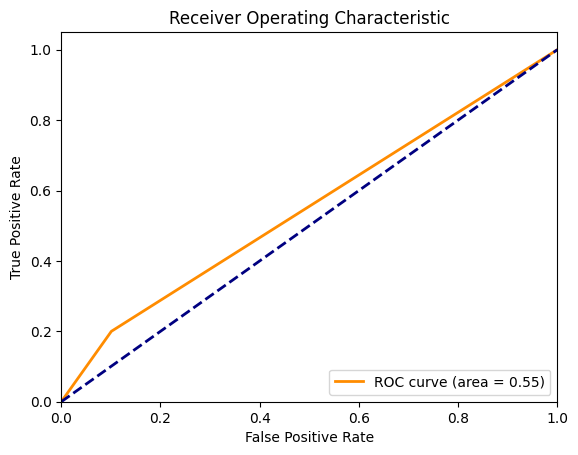

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

data_if = df_cleaned_features
labels_if = df_cleaned_labels

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(data_if, labels_if, test_size=0.2, stratify=labels_if, random_state=42)

# Feature scaling
scaler_if = StandardScaler()
X_train_scaled = scaler_if.fit_transform(X_train)
X_test_scaled = scaler_if.transform(X_test)

# Initialize model
model = IsolationForest(n_estimators=400, max_samples=5000, max_features=107, contamination=1/11)

# Fit model on training data and predict anomalies on test data
model.fit(X_train_scaled)
anomalies = model.predict(X_test_scaled)

# Convert anomalies to 0 and 1 for normal and anomaly respectively
anomalies = [0 if x == 1 else 1 for x in anomalies]

# Print classification report
print(classification_report(y_test, anomalies, zero_division=0)) 

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, anomalies)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, anomalies)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Second implementation.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

In [16]:
data_if = df_cleaned_features
labels_if = df_cleaned_labels

# Feature scaling
scaler_if = StandardScaler()
scaled_data_if = scaler_if.fit_transform(data_if)

In [17]:
# Initialize model
model = IsolationForest(n_estimators=200, max_samples= 5000, max_features=107,contamination=1/11)

# Fit model and predict anomalies
anomalies = model.fit_predict(scaled_data_if)

# Convert anomalies to 0 and 1 for normal and anomaly respectively
anomalies = [0 if x == 1 else 1 for x in anomalies]

# Assuming you have true labels for evaluation
print(classification_report(df_cleaned_labels, anomalies,zero_division=0))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5000
           1       0.19      0.19      0.19       500

    accuracy                           0.85      5500
   macro avg       0.55      0.55      0.55      5500
weighted avg       0.85      0.85      0.85      5500



In [18]:
label_diff_if = df_cleaned_labels - anomalies
label_sum_if = df_cleaned_labels + anomalies

print("True positives: ",(label_sum_if==0).sum())
print("True negatives: ",(label_sum_if==2).sum())
print("False positives: ",(label_diff_if==-1).sum())
print("False negatives:",(label_diff_if==1).sum())

True positives:  4595
True negatives:  95
False positives:  405
False negatives: 405


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest

# Define the parameter grid
param_grid = {
    'n_estimators': [25, 50],
    'max_samples': [128, 256],
    'max_features': [5, 10],
    'contamination': [0.1]
}

# Initialize the model
model = IsolationForest()
# Specify a scoring metric for GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(scaled_data_if)

# Get the best hyperparameter settings
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packa

In [35]:
# Fit the best model
best_model.fit(scaled_data_if)

# Predict anomalies
best_anomalies = best_model.predict(scaled_data_if)

# Convert anomalies to 0 and 1 for normal and anomaly respectively
best_anomalies = [0 if x == 1 else 1 for x in best_anomalies]

In [37]:
print(classification_report(df_cleaned_labels, best_anomalies,zero_division=0))

print(anomalies.count(1))

print(df_cleaned_labels.sum())

print(best_anomalies[:10])

print(df_cleaned_labels[:10])

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      5000
           1       0.06      0.06      0.06       500

    accuracy                           0.82      5500
   macro avg       0.48      0.48      0.48      5500
weighted avg       0.83      0.82      0.82      5500

5000
500
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: class, dtype: int64


## deep iForest

In [14]:
from sklearn.preprocessing import StandardScaler
from pyod.models.dif import DIF
from sklearn.metrics import classification_report

In [15]:
data_dif = df_cleaned_features
labels_dif = df_cleaned_labels

# Feature scaling
scaler_dif = StandardScaler()
scaled_data_dif = scaler_dif.fit_transform(data_dif)

In [16]:
# Create an instance of the DIF model
model_dif = DIF(contamination=1/11)

# Fit the model to your data
model_dif.fit(scaled_data_dif)

# Predict the binary labels (0: inliers, 1: outliers)
scores_dif = model_dif.labels_

# Compare the results with the true labels
report_dif = classification_report(labels_dif, scores_dif, zero_division=0)

NameError: name 'classification_report' is not defined

In [17]:
labels_diff_dif = labels_dif - scores_dif
labels_sum_dif = labels_dif + scores_dif

print("True positives: ",(labels_sum_dif==0).sum())
print("True negatives: ",(labels_sum_dif==2).sum())
print("False positives: ",(labels_diff_dif==-1).sum())
print("False negatives:",(labels_diff_dif==1).sum())

True positives:  4611
True negatives:  111
False positives:  389
False negatives: 389


## PCA

In [47]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Separate the features and labels
X = df_cleaned_features
y = df_cleaned_labels

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=40)
X_pca = pca.fit_transform(X_scaled)

# Calculate the anomaly score
distances = np.linalg.norm(X_scaled - pca.inverse_transform(X_pca), axis=1)
scores_pca = distances - np.mean(distances)
scores_pca = np.abs(scores_pca)

# Set a threshold for anomaly detection
threshold = np.percentile(scores_pca, 93)

# Identify outliers
outliers = np.where(scores_pca > threshold)[0]

In [48]:
# Create an array of zeros
labels_pca = np.zeros(len(y))

# Set the outlier position to 1
labels_pca[outliers] = 1

print(labels_pca[:20])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [49]:
# Print the outliers
print("Number of outliers:", len(outliers))

labels_diff_pca = y - labels_pca
labels_sum_pca = y + labels_pca

print("True positives: ",(labels_sum_pca==0).sum())
print("True negatives: ",(labels_sum_pca==2).sum())
print("False positives: ",(labels_diff_pca==-1).sum())
print("False negatives:",(labels_diff_pca==1).sum())

Number of outliers: 385
True positives:  4767
True negatives:  152
False positives:  233
False negatives: 348


## kNN 


On Training Data:
KNN ROC:0.6935, precision @ rank n:0.2325

On Test Data:
KNN ROC:0.68, precision @ rank n:0.21
PR AUC:  0.18698816797549908


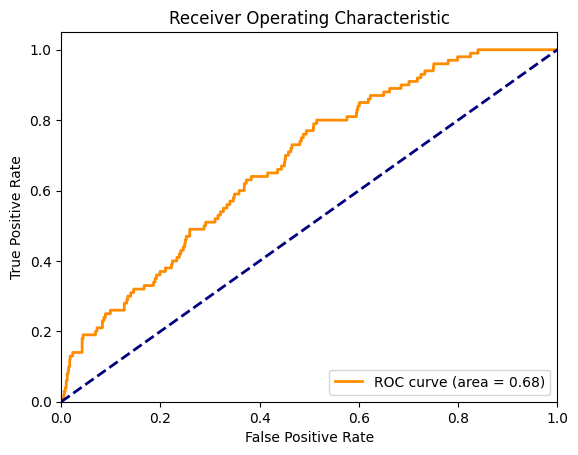

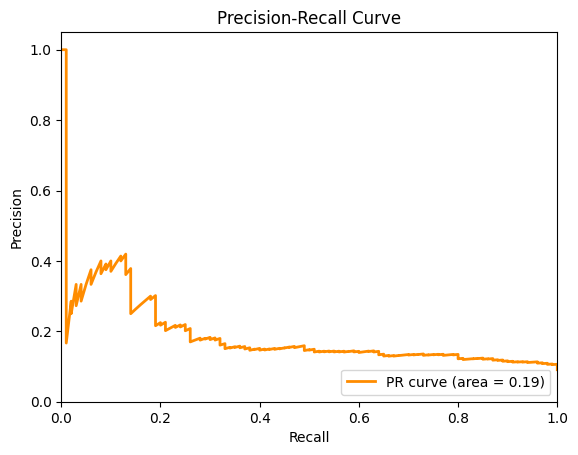

In [12]:
from pyod.models.knn import KNN
from pyod.utils.data import evaluate_print
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve, auc


CONTAMINATION = 1/11  # percentage of outliers

# Generate sample data
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(df_cleaned_features, df_cleaned_labels, test_size=0.2, stratify=df_cleaned_labels, random_state=42)

# train kNN detector
clf_name = 'KNN'
clf = KNN(contamination=CONTAMINATION, n_neighbors=15)
clf.fit(X_train_knn)

# get the prediction labels and outlier scores of the training data
y_train_knn_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_knn_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_knn_pred = clf.predict(X_test_knn)  # outlier labels (0 or 1)
y_test_knn_scores = clf.decision_function(X_test_knn)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train_knn, y_train_knn_scores)

print("\nOn Test Data:")
evaluate_print(clf_name, y_test_knn, y_test_knn_scores)
precision, recall, _ = precision_recall_curve(y_test_knn, y_test_knn_scores)
pr_auc = auc(recall, precision)
print("PR AUC: ", pr_auc)


# Plot ROC curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_knn, y_test_knn_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot PR curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

## multiple methods 

Params: {'n_neighbors': 5, 'contamination': 0.09090909090909091}, AUC-ROC: 0.753491875
Params: {'n_neighbors': 20, 'contamination': 0.09090909090909091}, AUC-ROC: 0.78844625
Params: {'n_neighbors': 50, 'contamination': 0.09090909090909091}, AUC-ROC: 0.8024275000000001
Best Params: {'n_neighbors': 50, 'contamination': 0.09090909090909091}, Best AUC-ROC: 0.8024275000000001
Params: {'n_estimators': 50, 'contamination': 0.09090909090909091}, AUC-ROC: 0.68573875
Params: {'n_estimators': 100, 'contamination': 0.09090909090909091}, AUC-ROC: 0.653706875
Params: {'n_estimators': 200, 'contamination': 0.09090909090909091}, AUC-ROC: 0.713979375
Best Params: {'n_estimators': 200, 'contamination': 0.09090909090909091}, Best AUC-ROC: 0.713979375
Params: {'n_neighbors': 5, 'contamination': 0.09090909090909091}, AUC-ROC: 0.6736874999999999
Params: {'n_neighbors': 20, 'contamination': 0.09090909090909091}, AUC-ROC: 0.7242662499999999
Best Params: {'n_neighbors': 20, 'contamination': 0.09090909090909091

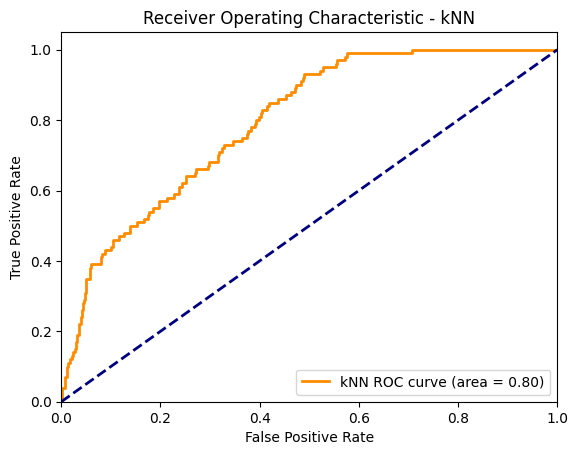

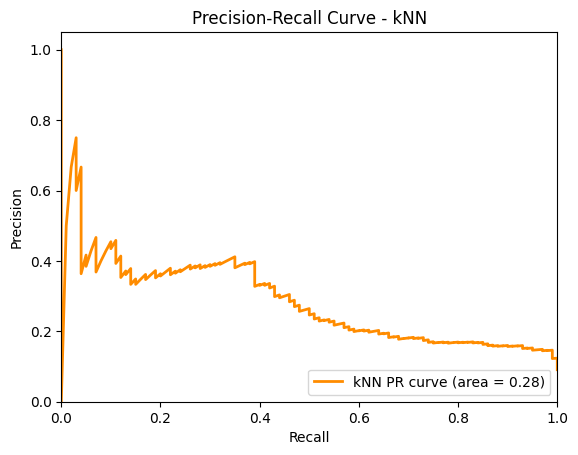

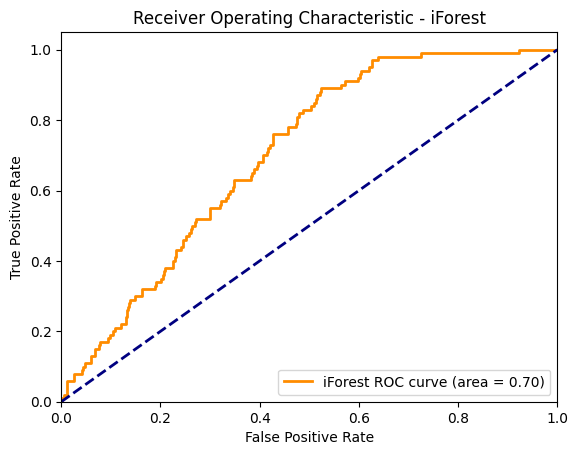

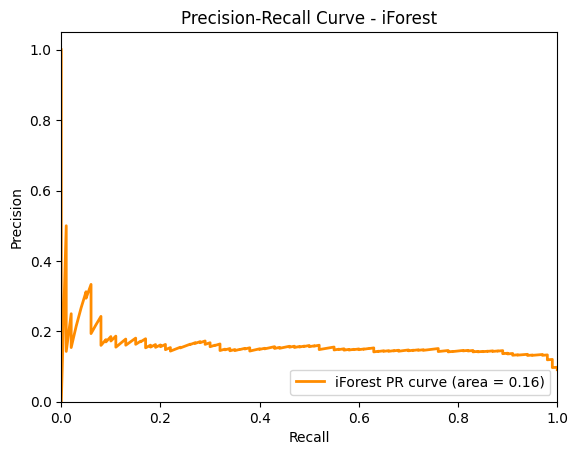

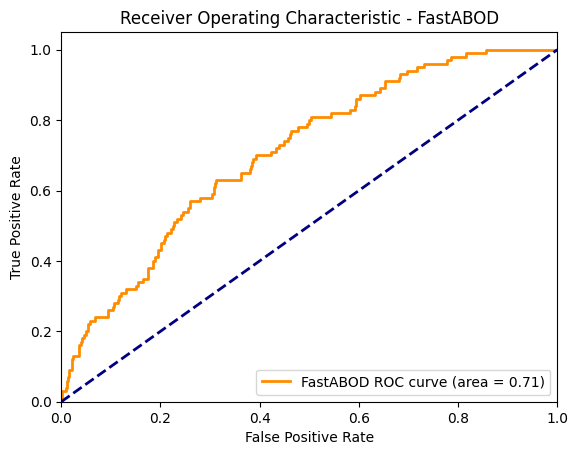

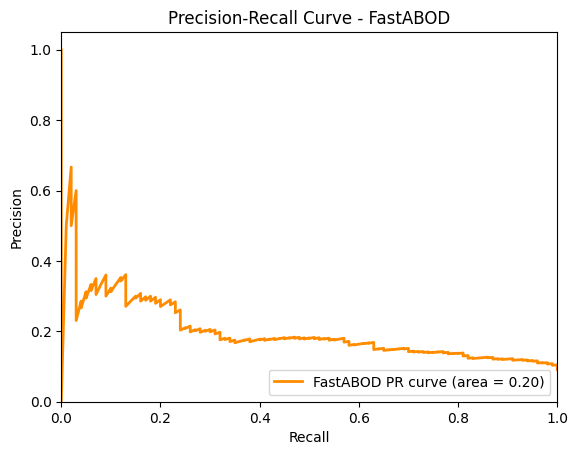

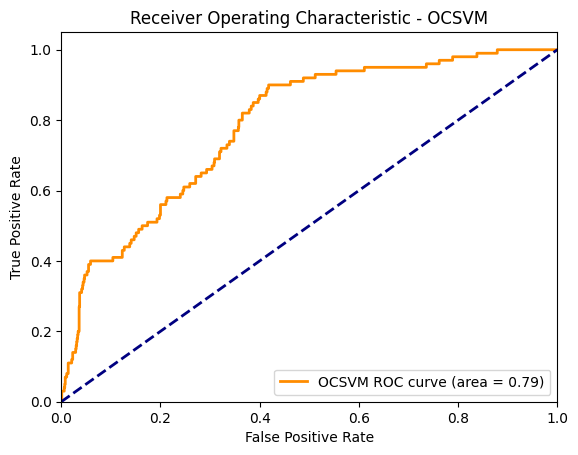

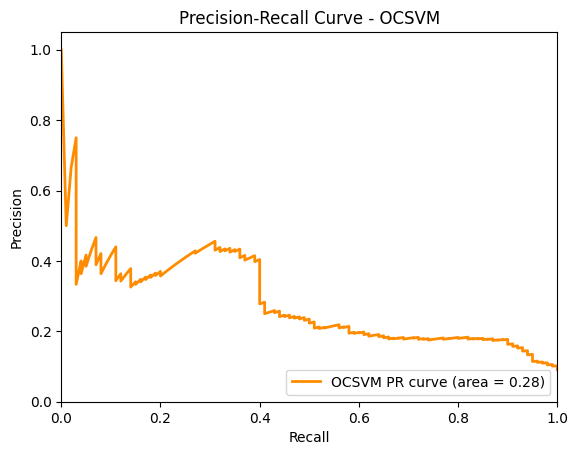

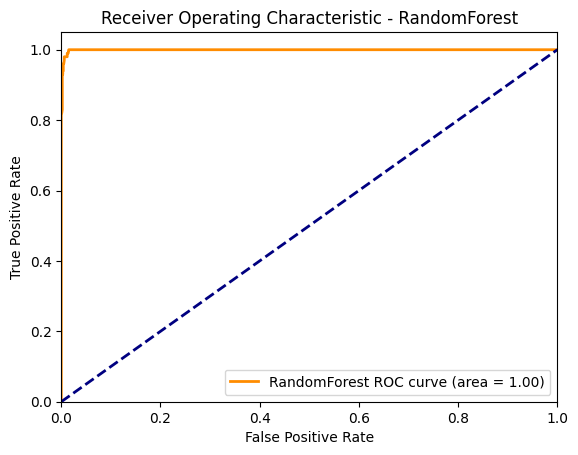

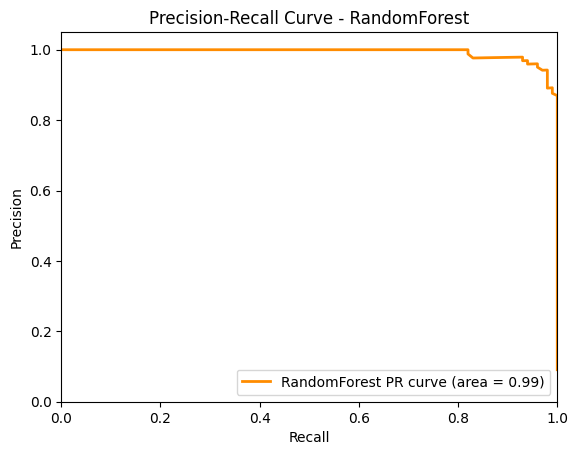

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.abod import ABOD
from pyod.models.ocsvm import OCSVM
from pyod.utils.data import evaluate_print
import matplotlib.pyplot as plt

CONTAMINATION = 1/11  # percentage of outliers

X = df_cleaned_features
y = df_cleaned_labels

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Custom Grid Search Function
def custom_grid_search_cv(model_class, param_grid, X_train, y_train):
    best_score = -np.inf
    best_params = None
    best_model = None
    
    for params in param_grid:
        try:
            model = model_class(**params)
            model.fit(X_train)
            y_train_scores = model.decision_scores_
            mean_score = roc_auc_score(y_train, y_train_scores)
            #scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
            #mean_score = scores.mean()
            print(f"Params: {params}, AUC-ROC: {mean_score}")
            if mean_score > best_score:
                best_score = mean_score
                best_params = params
                best_model = model
        except Exception as e:
            print(f"Error with params {params}: {e}")
    print(f"Best Params: {best_params}, Best AUC-ROC: {best_score}")
    return best_model

# Define parameter grids
knn_param_grid = [{'n_neighbors': k, 'contamination': c} for k in [5, 20, 50] for c in [CONTAMINATION]]
iforest_param_grid = [{'n_estimators': n, 'contamination': c} for n in [50, 100, 200] for c in [CONTAMINATION]]
fastabod_param_grid = [{'n_neighbors': k, 'contamination': c} for k in [5, 20] for c in [CONTAMINATION]]
ocsvm_param_grid = [{'nu': n, 'kernel': k, 'gamma': g, 'contamination': c} for n in [0.1, 0.3] for k in ['linear', 'rbf'] for g in ['scale'] for c in [CONTAMINATION]]

# Perform grid search for each model
best_knn = custom_grid_search_cv(KNN, knn_param_grid, X_train, y_train)
best_iforest = custom_grid_search_cv(IForest, iforest_param_grid, X_train, y_train)
best_fastabod = custom_grid_search_cv(ABOD, fastabod_param_grid, X_train, y_train)
best_ocsvm= custom_grid_search_cv(OCSVM, ocsvm_param_grid, X_train, y_train)

# Save models in a dictionary
best_models = {'KNN': best_knn, 'IForest': best_iforest, 'FastABOD': best_fastabod, 'OCSVM': best_ocsvm}

# RandomForest Classifier (Supervised)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, scoring='roc_auc', cv=5)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
print(f"Best Params for RandomForest: {grid_search_rf.best_params_}, Best AUC-ROC: {grid_search_rf.best_score_}")

best_models['RandomForest'] = best_rf

# Evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    if model:
        if model_name == 'RandomForest':
            y_train_pred = model.predict(X_train)
            y_train_scores = model.predict_proba(X_train)[:, 1]
            y_test_pred = model.predict(X_test)
            y_test_scores = model.predict_proba(X_test)[:, 1]
        else:
            y_train_pred = model.labels_
            y_train_scores = model.decision_scores_
            y_test_pred = model.predict(X_test)
            y_test_scores = model.decision_function(X_test)

        print(f"\nOn Training Data ({model_name}):")
        evaluate_print(model_name, y_train, y_train_scores)
        print(f"\nOn Test Data ({model_name}):")
        evaluate_print(model_name, y_test, y_test_scores)
        precision, recall, _ = precision_recall_curve(y_test, y_test_scores)
        pr_auc = auc(recall, precision)
        print(f"PR AUC ({model_name}): ", pr_auc)
        return y_test_scores, model_name
    else:
        print(f"Model {model_name} could not be evaluated.")
        return None, model_name

# Train and evaluate models
y_test_scores_knn, _ = evaluate_model(best_knn, X_train, y_train, X_test, y_test, 'KNN')
y_test_scores_if, _ = evaluate_model(best_iforest, X_train, y_train, X_test, y_test, 'IForest')
y_test_scores_fabod, _ = evaluate_model(best_fastabod, X_train, y_train, X_test, y_test, 'FastABOD')
y_test_scores_ocsvm, _ = evaluate_model(best_ocsvm, X_train, y_train, X_test, y_test, 'OCSVM')
y_test_scores_rf, _ = evaluate_model(best_rf, X_train, y_train, X_test, y_test, 'RandomForest')

# Plot ROC and PR curves
def plot_roc_pr_curves(y_test, y_test_scores, model_name):
    if y_test_scores is not None:
        fpr, tpr, _ = roc_curve(y_test, y_test_scores)
        roc_auc = auc(fpr, tpr)
        precision, recall, _ = precision_recall_curve(y_test, y_test_scores)
        pr_auc = auc(recall, precision)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {model_name}')
        plt.legend(loc="lower right")
        plt.show()

        plt.figure()
        plt.plot(recall, precision, color='darkorange', lw=2, label=f'{model_name} PR curve (area = %0.2f)' % pr_auc)
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.show()

plot_roc_pr_curves(y_test, y_test_scores_knn, 'kNN')
plot_roc_pr_curves(y_test, y_test_scores_if, 'iForest')
plot_roc_pr_curves(y_test, y_test_scores_fabod, 'FastABOD')
plot_roc_pr_curves(y_test, y_test_scores_ocsvm, 'OCSVM')
plot_roc_pr_curves(y_test, y_test_scores_rf, 'RandomForest')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.abod import ABOD
from pyod.models.ocsvm import OCSVM
from pyod.utils.data import evaluate_print
import matplotlib.pyplot as plt

CONTAMINATION = 1/11  # percentage of outliers

# Assume df_cleaned_features and df_cleaned_labels are defined
X = df_cleaned_features
y = df_cleaned_labels

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Custom Grid Search Function
def custom_grid_search_cv(model_class, param_grid, X_train, y_train):
    best_score = -np.inf
    best_params = None
    best_model = None
    
    for params in param_grid:
        try:
            model = model_class(**params)
            model.fit(X_train)
            y_train_scores = model.decision_scores_
            mean_score = roc_auc_score(y_train, y_train_scores)
            print(f"Params: {params}, AUC-ROC: {mean_score}")
            if mean_score > best_score:
                best_score = mean_score
                best_params = params
                best_model = model
        except Exception as e:
            print(f"Error with params {params}: {e}")
    print(f"Best Params: {best_params}, Best AUC-ROC: {best_score}")
    return best_model

# Define parameter grids
knn_param_grid = [{'n_neighbors': k, 'contamination': c} for k in [5, 20, 50] for c in [CONTAMINATION]]
iforest_param_grid = [{'n_estimators': n, 'contamination': c} for n in [50, 100, 200] for c in [CONTAMINATION]]
fastabod_param_grid = [{'n_neighbors': k, 'contamination': c} for k in [5, 20] for c in [CONTAMINATION]]
ocsvm_param_grid = [{'nu': n, 'kernel': k, 'gamma': g, 'contamination': c} for n in [0.1, 0.3] for k in ['linear', 'rbf'] for g in ['scale'] for c in [CONTAMINATION]]

# Perform grid search for each model
best_knn = custom_grid_search_cv(KNN, knn_param_grid, X_train, y_train)
best_iforest = custom_grid_search_cv(IForest, iforest_param_grid, X_train, y_train)
best_fastabod = custom_grid_search_cv(ABOD, fastabod_param_grid, X_train, y_train)
best_ocsvm = custom_grid_search_cv(OCSVM, ocsvm_param_grid, X_train, y_train)

# Save models in a dictionary
best_models = {'KNN': best_knn, 'IForest': best_iforest, 'FastABOD': best_fastabod, 'OCSVM': best_ocsvm}

# RandomForest Classifier (Supervised)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, scoring='roc_auc', cv=5)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
print(f"Best Params for RandomForest: {grid_search_rf.best_params_}, Best AUC-ROC: {grid_search_rf.best_score_}")

best_models['RandomForest'] = best_rf

# XGBoost Classifier (Supervised)
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

xgb_clf = XGBClassifier(random_state=42)
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=xgb_param_grid, scoring='roc_auc', cv=5)
grid_search_xgb.fit(X_train, y_train)

best_xgb = grid_search_xgb.best_estimator_
print(f"Best Params for XGBoost: {grid_search_xgb.best_params_}, Best AUC-ROC: {grid_search_xgb.best_score_}")

best_models['XGBoost'] = best_xgb

# SVM Classifier (Supervised)
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

svm_clf = SVC(probability=True, random_state=42)
grid_search_svm = GridSearchCV(estimator=svm_clf, param_grid=svm_param_grid, scoring='roc_auc', cv=5)
grid_search_svm.fit(X_train, y_train)

best_svm = grid_search_svm.best_estimator_
print(f"Best Params for SVM: {grid_search_svm.best_params_}, Best AUC-ROC: {grid_search_svm.best_score_}")

best_models['SVM'] = best_svm

# Evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    if model:
        if model_name in ['RandomForest', 'XGBoost', 'SVM']:
            y_train_pred = model.predict(X_train)
            y_train_scores = model.predict_proba(X_train)[:, 1]
            y_test_pred = model.predict(X_test)
            y_test_scores = model.predict_proba(X_test)[:, 1]
        else:
            y_train_pred = model.labels_
            y_train_scores = model.decision_scores_
            y_test_pred = model.predict(X_test)
            y_test_scores = model.decision_function(X_test)

        print(f"\nOn Training Data ({model_name}):")
        evaluate_print(model_name, y_train, y_train_scores)
        print(f"\nOn Test Data ({model_name}):")
        evaluate_print(model_name, y_test, y_test_scores)
        precision, recall, _ = precision_recall_curve(y_test, y_test_scores)
        pr_auc = auc(recall, precision)
        print(f"PR AUC ({model_name}): ", pr_auc)
        return y_test_scores, model_name
    else:
        print(f"Model {model_name} could not be evaluated.")
        return None, model_name

# Train and evaluate models
y_test_scores_knn, _ = evaluate_model(best_knn, X_train, y_train, X_test, y_test, 'KNN')
y_test_scores_if, _ = evaluate_model(best_iforest, X_train, y_train, X_test, y_test, 'IForest')
y_test_scores_fabod, _ = evaluate_model(best_fastabod, X_train, y_train, X_test, y_test, 'FastABOD')
y_test_scores_ocsvm, _ = evaluate_model(best_ocsvm, X_train, y_train, X_test, y_test, 'OCSVM')
y_test_scores_rf, _ = evaluate_model(best_rf, X_train, y_train, X_test, y_test, 'RandomForest')
y_test_scores_xgb, _ = evaluate_model(best_xgb, X_train, y_train, X_test, y_test, 'XGBoost')
y_test_scores_svm, _ = evaluate_model(best_svm, X_train, y_train, X_test, y_test, 'SVM')

# Plot ROC and PR curves
def plot_roc_pr_curves(y_test, y_test_scores, model_name):
    if y_test_scores is not None:
        fpr, tpr, _ = roc_curve(y_test, y_test_scores)
        roc_auc = auc(fpr, tpr)
        precision, recall, _ = precision_recall_curve(y_test, y_test_scores)
        pr_auc = auc(recall, precision)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {model_name}')
        plt.legend(loc="lower right")
        plt.show()

        plt.figure()
        plt.plot(recall, precision, color='darkorange', lw=2, label=f'{model_name} PR curve (area = %0.2f)' % pr_auc)
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.show()

plot_roc_pr_curves(y_test, y_test_scores_knn, 'kNN')
plot_roc_pr_curves(y_test, y_test_scores_if, 'iForest')
plot_roc_pr_curves(y_test, y_test_scores_fabod, 'FastABOD')
plot_roc_pr_curves(y_test, y_test_scores_ocsvm, 'OCSVM')
plot_roc_pr_curves(y_test, y_test_scores_rf, 'RandomForest')
plot_roc_pr_curves(y_test, y_test_scores_xgb, 'XGBoost')
plot_roc_pr_curves(y_test, y_test_scores_svm, 'SVM')


Params: {'n_neighbors': 5, 'contamination': 0.09090909090909091}, Average Precision: 0.21972143396121385
Params: {'n_neighbors': 20, 'contamination': 0.09090909090909091}, Average Precision: 0.25002592956322445
Params: {'n_neighbors': 50, 'contamination': 0.09090909090909091}, Average Precision: 0.2752283911249186
Best Params: {'n_neighbors': 50, 'contamination': 0.09090909090909091}, Best Average Precision: 0.2752283911249186
Params: {'n_estimators': 50, 'contamination': 0.09090909090909091}, Average Precision: 0.14497784259000668
Params: {'n_estimators': 100, 'contamination': 0.09090909090909091}, Average Precision: 0.14232190031445774
Params: {'n_estimators': 200, 'contamination': 0.09090909090909091}, Average Precision: 0.1613478345397698
Best Params: {'n_estimators': 200, 'contamination': 0.09090909090909091}, Best Average Precision: 0.1613478345397698
Params: {'n_neighbors': 5, 'contamination': 0.09090909090909091}, Average Precision: 0.17054961601898613
Params: {'n_neighbors': 2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:22:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:22:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:22:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:22:02] WARNING: /Users/runner/work/xgboost/xgboost/src

Best Params for XGBoost: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200}, Best Average Precision: 0.9946244591733994
Best Params for SVM: {'C': 10, 'kernel': 'rbf'}, Best Average Precision: 0.9861853344812321

On Training Data (KNN):
KNN ROC:0.8024, precision @ rank n:0.385

On Test Data (KNN):
KNN ROC:0.7952, precision @ rank n:0.39
PR AUC (KNN):  0.2797736551167751

On Training Data (IForest):
IForest ROC:0.6879, precision @ rank n:0.1825

On Test Data (IForest):
IForest ROC:0.6792, precision @ rank n:0.15
PR AUC (IForest):  0.14449174288614325

On Training Data (FastABOD):
FastABOD ROC:0.7243, precision @ rank n:0.265

On Test Data (FastABOD):
FastABOD ROC:0.7088, precision @ rank n:0.24
PR AUC (FastABOD):  0.19605315160169595

On Training Data (OCSVM):
OCSVM ROC:0.7943, precision @ rank n:0.36

On Test Data (OCSVM):
OCSVM ROC:0.7852, precision @ rank n:0.4
PR AUC (OCSVM):  0.28056216409834706

On Training Data (RandomForest):
RandomForest ROC:1.0, precision @ rank n:1.0

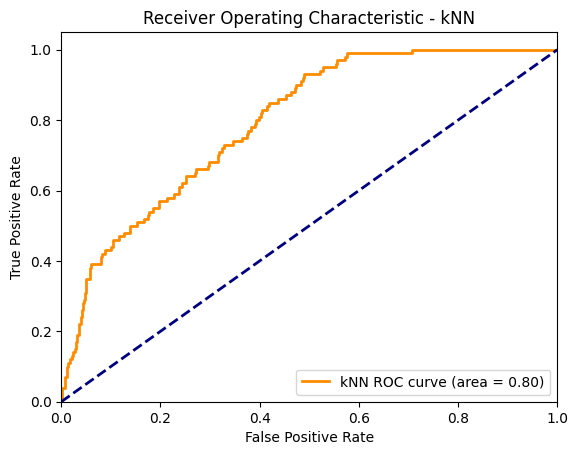

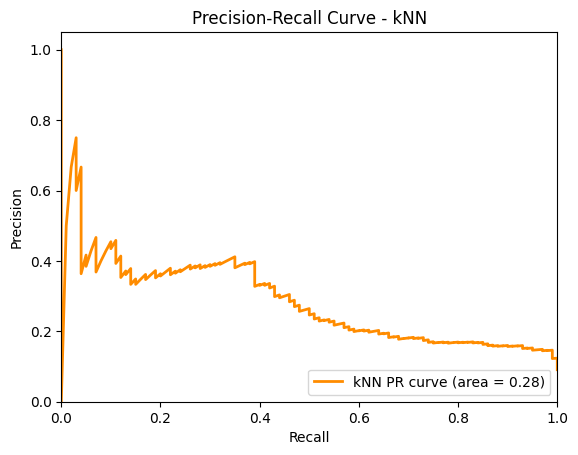

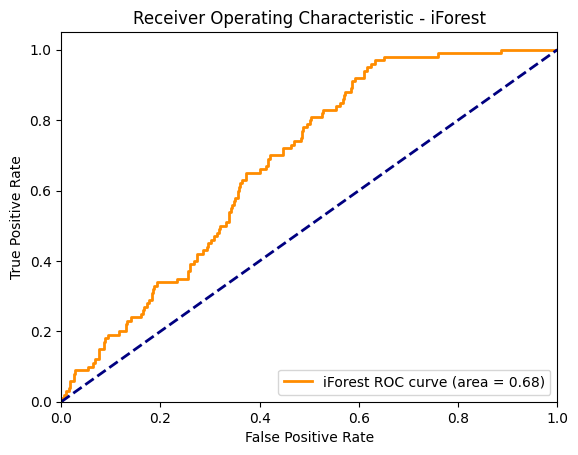

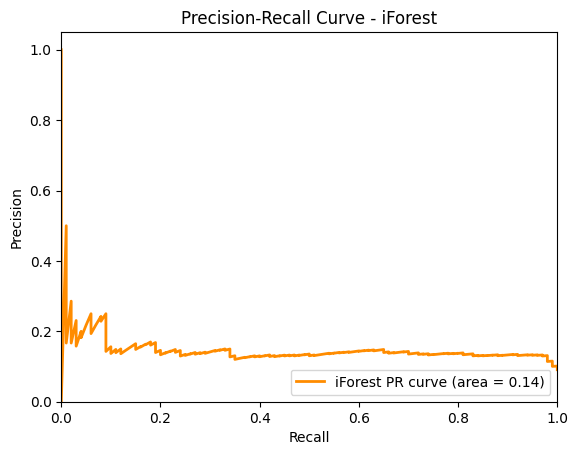

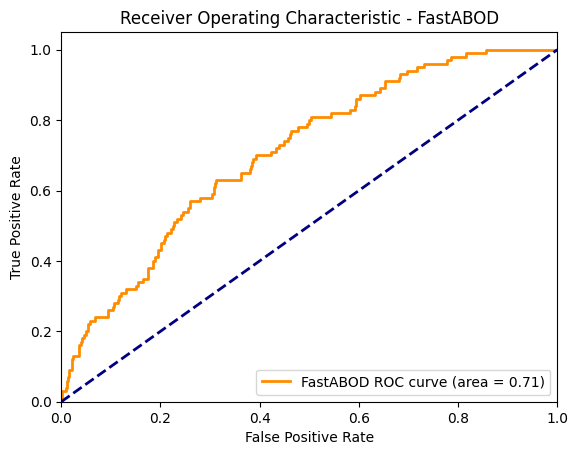

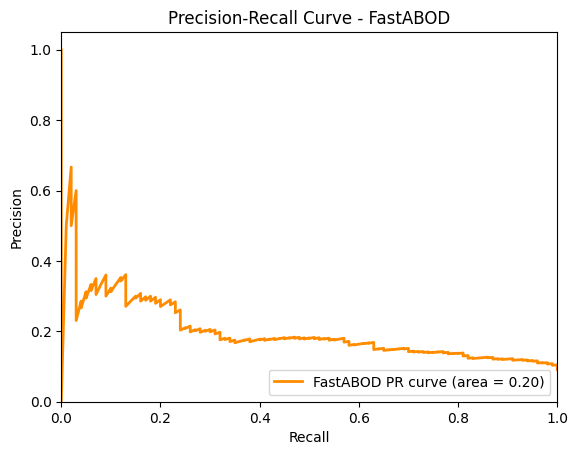

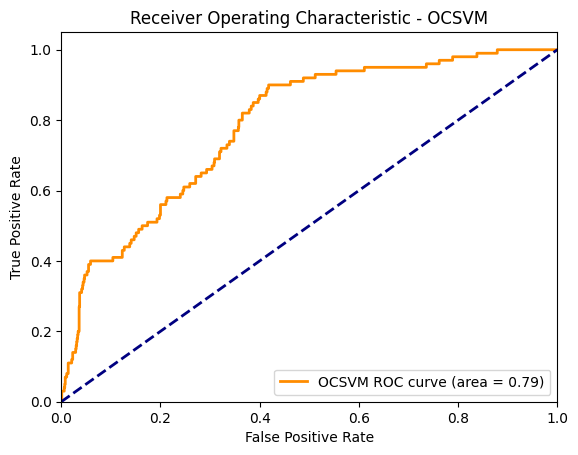

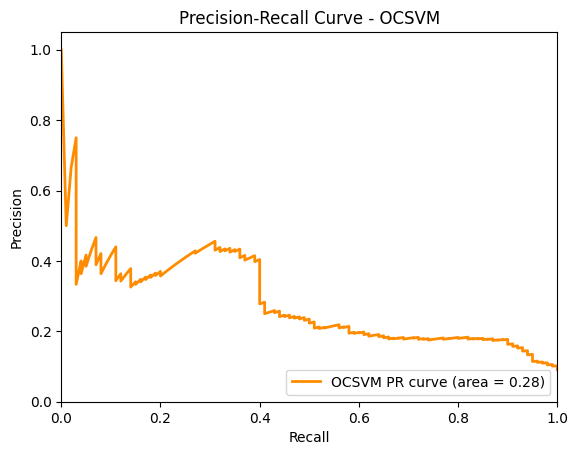

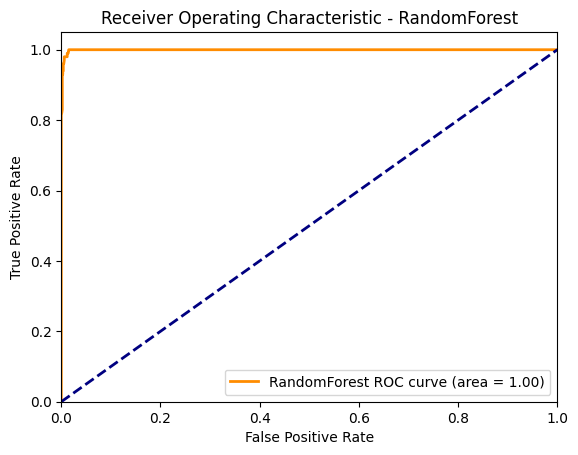

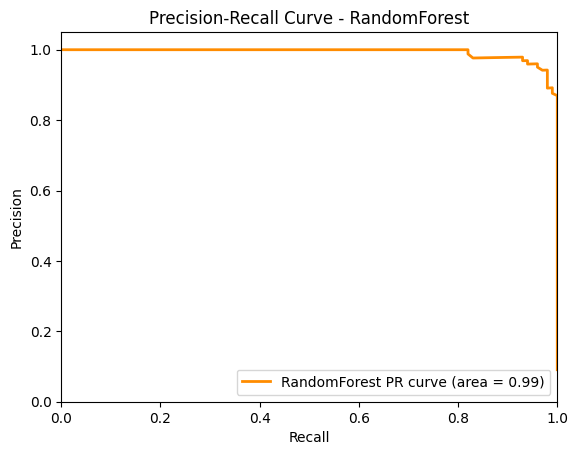

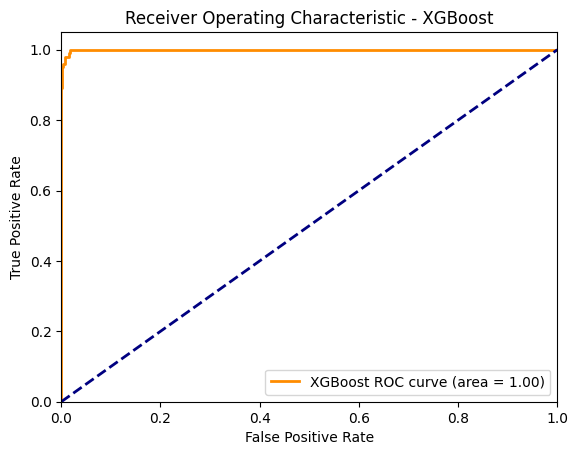

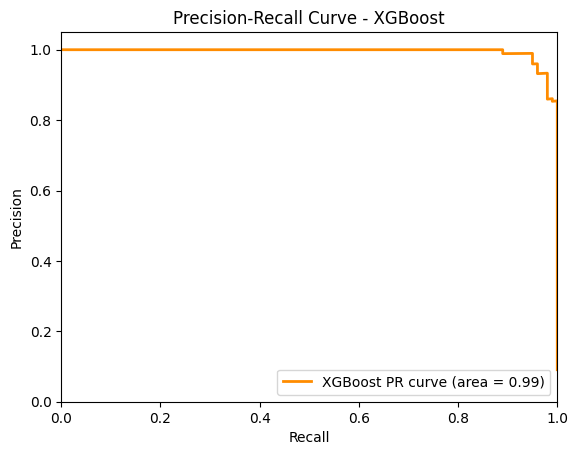

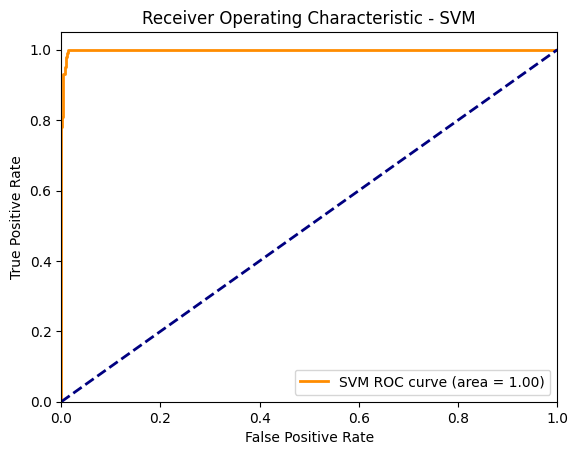

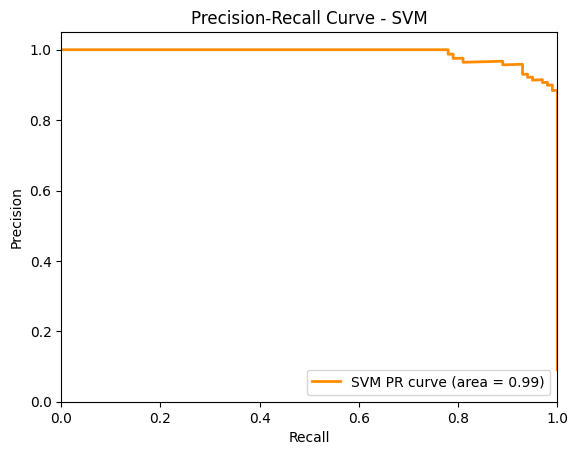

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.abod import ABOD
from pyod.models.ocsvm import OCSVM
from pyod.utils.data import evaluate_print
import matplotlib.pyplot as plt

CONTAMINATION = 1/11  # percentage of outliers

# Assume df_cleaned_features and df_cleaned_labels are defined
X = df_cleaned_features
y = df_cleaned_labels

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Custom Grid Search Function for all models
def custom_grid_search_cv(model_class, param_grid, X_train, y_train):
    best_score = -np.inf
    best_params = None
    best_model = None
    
    for params in param_grid:
        try:
            model = model_class(**params)
            model.fit(X_train)
            y_train_scores = model.decision_scores_ if hasattr(model, 'decision_scores_') else model.predict_proba(X_train)[:, 1]
            mean_score = average_precision_score(y_train, y_train_scores)
            print(f"Params: {params}, Average Precision: {mean_score}")
            if mean_score > best_score:
                best_score = mean_score
                best_params = params
                best_model = model
        except Exception as e:
            print(f"Error with params {params}: {e}")
    print(f"Best Params: {best_params}, Best Average Precision: {best_score}")
    return best_model

# Define parameter grids for anomaly detection models
knn_param_grid = [{'n_neighbors': k, 'contamination': c} for k in [5, 20, 50] for c in [CONTAMINATION]]
iforest_param_grid = [{'n_estimators': n, 'contamination': c} for n in [50, 100, 200] for c in [CONTAMINATION]]
fastabod_param_grid = [{'n_neighbors': k, 'contamination': c} for k in [5, 20] for c in [CONTAMINATION]]
ocsvm_param_grid = [{'nu': n, 'kernel': k, 'gamma': g, 'contamination': c} for n in [0.1, 0.3] for k in ['linear', 'rbf'] for g in ['scale'] for c in [CONTAMINATION]]

# Perform grid search for each anomaly detection model
best_knn = custom_grid_search_cv(KNN, knn_param_grid, X_train, y_train)
best_iforest = custom_grid_search_cv(IForest, iforest_param_grid, X_train, y_train)
best_fastabod = custom_grid_search_cv(ABOD, fastabod_param_grid, X_train, y_train)
best_ocsvm = custom_grid_search_cv(OCSVM, ocsvm_param_grid, X_train, y_train)

# Save anomaly detection models in a dictionary
best_models = {'KNN': best_knn, 'IForest': best_iforest, 'FastABOD': best_fastabod, 'OCSVM': best_ocsvm}

# RandomForest Classifier (Supervised)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, scoring='average_precision', cv=5)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
print(f"Best Params for RandomForest: {grid_search_rf.best_params_}, Best Average Precision: {grid_search_rf.best_score_}")

best_models['RandomForest'] = best_rf

# XGBoost Classifier (Supervised)
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
}

xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=xgb_param_grid, scoring='average_precision', cv=5)
grid_search_xgb.fit(X_train, y_train)

best_xgb = grid_search_xgb.best_estimator_
print(f"Best Params for XGBoost: {grid_search_xgb.best_params_}, Best Average Precision: {grid_search_xgb.best_score_}")

best_models['XGBoost'] = best_xgb

# SVM Classifier (Supervised)
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}

svm_clf = SVC(probability=True, random_state=42)
grid_search_svm = GridSearchCV(estimator=svm_clf, param_grid=svm_param_grid, scoring='average_precision', cv=5)
grid_search_svm.fit(X_train, y_train)

best_svm = grid_search_svm.best_estimator_
print(f"Best Params for SVM: {grid_search_svm.best_params_}, Best Average Precision: {grid_search_svm.best_score_}")

best_models['SVM'] = best_svm

# Evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    if model:
        if model_name in ['RandomForest', 'XGBoost', 'SVM']:
            y_train_pred = model.predict(X_train)
            y_train_scores = model.predict_proba(X_train)[:, 1]
            y_test_pred = model.predict(X_test)
            y_test_scores = model.predict_proba(X_test)[:, 1]
        else:
            y_train_pred = model.labels_
            y_train_scores = model.decision_scores_
            y_test_pred = model.predict(X_test)
            y_test_scores = model.decision_function(X_test)

        print(f"\nOn Training Data ({model_name}):")
        evaluate_print(model_name, y_train, y_train_scores)
        print(f"\nOn Test Data ({model_name}):")
        evaluate_print(model_name, y_test, y_test_scores)
        precision, recall, _ = precision_recall_curve(y_test, y_test_scores)
        pr_auc = auc(recall, precision)
        print(f"PR AUC ({model_name}): ", pr_auc)
        return y_test_scores, model_name
    else:
        print(f"Model {model_name} could not be evaluated.")
        return None, model_name

# Train and evaluate models
y_test_scores_knn, _ = evaluate_model(best_knn, X_train, y_train, X_test, y_test, 'KNN')
y_test_scores_if, _ = evaluate_model(best_iforest, X_train, y_train, X_test, y_test, 'IForest')
y_test_scores_fabod, _ = evaluate_model(best_fastabod, X_train, y_train, X_test, y_test, 'FastABOD')
y_test_scores_ocsvm, _ = evaluate_model(best_ocsvm, X_train, y_train, X_test, y_test, 'OCSVM')
y_test_scores_rf, _ = evaluate_model(best_rf, X_train, y_train, X_test, y_test, 'RandomForest')
y_test_scores_xgb, _ = evaluate_model(best_xgb, X_train, y_train, X_test, y_test, 'XGBoost')
y_test_scores_svm, _ = evaluate_model(best_svm, X_train, y_train, X_test, y_test, 'SVM')

# Plot ROC and PR curves
def plot_roc_pr_curves(y_test, y_test_scores, model_name):
    if y_test_scores is not None:
        fpr, tpr, _ = roc_curve(y_test, y_test_scores)
        roc_auc = auc(fpr, tpr)
        precision, recall, _ = precision_recall_curve(y_test, y_test_scores)
        pr_auc = auc(recall, precision)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {model_name}')
        plt.legend(loc="lower right")
        plt.show()

        plt.figure()
        plt.plot(recall, precision, color='darkorange', lw=2, label=f'{model_name} PR curve (area = %0.2f)' % pr_auc)
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.show()

plot_roc_pr_curves(y_test, y_test_scores_knn, 'kNN')
plot_roc_pr_curves(y_test, y_test_scores_if, 'iForest')
plot_roc_pr_curves(y_test, y_test_scores_fabod, 'FastABOD')
plot_roc_pr_curves(y_test, y_test_scores_ocsvm, 'OCSVM')
plot_roc_pr_curves(y_test, y_test_scores_rf, 'RandomForest')
plot_roc_pr_curves(y_test, y_test_scores_xgb, 'XGBoost')
plot_roc_pr_curves(y_test, y_test_scores_svm, 'SVM')


## experiments with balanced data 
in this section i am trying to train model on a dataset composed by 50% of inliers and 50% of outliers.
it seems to have better results on certain metric (i.e. AUC-PR, that make sense to use because of the large amount of inliers in the dataset df_cleaned). 

class
1    500
0    500
Name: count, dtype: int64

On Training Data:
KNN ROC:0.2462, precision @ rank n:0.325

On Test Data:
KNN ROC:0.3313, precision @ rank n:0.38
PR AUC:  0.44138098901554607


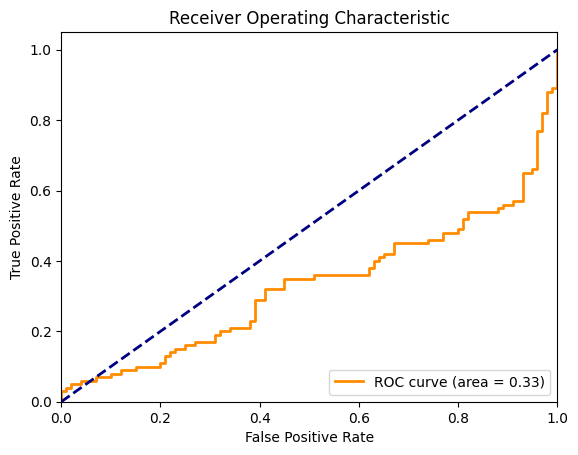

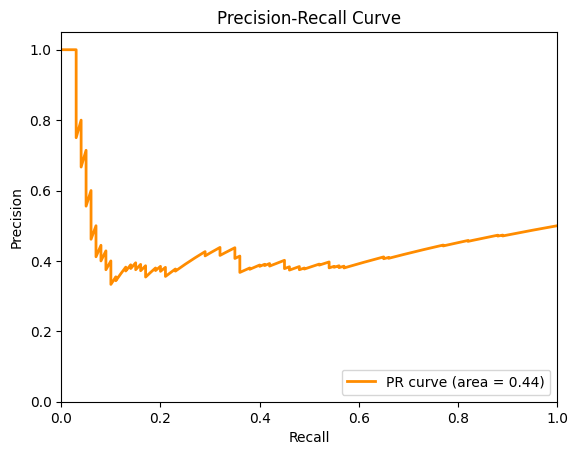

In [7]:
## Equalize the number of inliers and outliers

import pandas as pd

# Select 500 inliers
inliers = df_cleaned[df_cleaned['class'] == 0]
inliers_sampled = inliers.sample(n=500, random_state=42)

# Select 500 outliers
outliers = df_cleaned[df_cleaned['class'] == 1]
outliers_sampled = outliers.sample(n=500, random_state=42)

# Concatenate the inliers and outliers
df_eq = pd.concat([inliers_sampled, outliers_sampled])

# Shuffle the dataset
df_eq = df_eq.sample(frac=1, random_state=42)

# Split the dataset into features and labels
X = df_eq.iloc[:, :-1]
y = df_eq.iloc[:, -1]

# Display the first few rows of the dataset
df_eq.head()
from pyod.models.knn import KNN
from pyod.utils.data import evaluate_print
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve, auc

print(df_eq['class'].value_counts())


## Try kNN 

CONTAMINATION = 1/2  # percentage of outliers

# Generate sample data
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# train kNN detector
clf_name = 'KNN'
clf = KNN(contamination=CONTAMINATION, n_neighbors=100)
clf.fit(X_train_knn)

# get the prediction labels and outlier scores of the training data
y_train_knn_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_knn_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_knn_pred = clf.predict(X_test_knn)  # outlier labels (0 or 1)
y_test_knn_scores = clf.decision_function(X_test_knn)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train_knn, y_train_knn_scores)

print("\nOn Test Data:")
evaluate_print(clf_name, y_test_knn, y_test_knn_scores)
precision, recall, _ = precision_recall_curve(y_test_knn, y_test_knn_scores)
pr_auc = auc(recall, precision)
print("PR AUC: ", pr_auc)


# Plot ROC curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_knn, y_test_knn_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot PR curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

The results above are not that good. It may be because of the kNN detector that isnt suitable to high dimensional data.

Now we try with isolation forest and see how it work.

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc, make_scorer, f1_score
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.abod import ABOD
from pyod.models.ocsvm import OCSVM
from pyod.utils.data import evaluate_print
import matplotlib.pyplot as plt

# Ensure df_cleaned is defined and properly cleaned
# df_cleaned = ... (Load and clean your dataset here)

# Equalize the number of inliers and outliers
inliers = df_cleaned[df_cleaned['class'] == 0].sample(n=500, random_state=42)
outliers = df_cleaned[df_cleaned['class'] == 1].sample(n=500, random_state=42)

# Concatenate and shuffle the dataset
df_eq = pd.concat([inliers, outliers]).sample(frac=1, random_state=42)
X = df_eq.iloc[:, :-1]
y = df_eq.iloc[:, -1]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Custom scoring function to handle potential issues
def custom_scorer(estimator, X, y):
    try:
        y_pred = estimator.predict(X)
        return f1_score(y, y_pred)
    except Exception as e:
        print(f"Error in scoring function: {e}")
        return np.nan

# Function to perform grid search and cross-validation
def grid_search_cv(model, param_grid, model_name):
    try:
        gs = GridSearchCV(model, param_grid, scoring=make_scorer(custom_scorer), cv=5, verbose=3)
        gs.fit(X_train)
        best_model = gs.best_estimator_
        cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring=make_scorer(custom_scorer))
        print(f"Cross-Validation F1 Scores ({model_name}):", cv_scores)
        print(f"Mean CV F1 Score ({model_name}):", cv_scores.mean())
        return best_model
    except Exception as e:
        print(f"Error in grid search for {model_name}: {e}")
        return None

# Simplified parameter grids for debugging
knn_params = {'n_neighbors': [5, 20], 'contamination': [0.5]}
iforest_params = {'n_estimators': [50, 100], 'contamination': [0.5]}
fastabod_params = {'n_neighbors': [5, 20]}
ocsvm_params = {'nu': [0.1, 0.3], 'kernel': ['linear', 'rbf'], 'gamma': ['scale']}

# Hyperparameter tuning for kNN
best_knn = grid_search_cv(KNN(), knn_params, 'KNN')

# Hyperparameter tuning for Isolation Forest
best_iforest = grid_search_cv(IForest(), iforest_params, 'IForest')

# Hyperparameter tuning for FastABOD
best_fastabod = grid_search_cv(ABOD(), fastabod_params, 'FastABOD')

# Hyperparameter tuning for One-Class SVM
best_ocsvm = grid_search_cv(OCSVM(), ocsvm_params, 'OCSVM')

# Evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    if model:
        y_train_pred = model.labels_
        y_train_scores = model.decision_scores_
        y_test_pred = model.predict(X_test)
        y_test_scores = model.decision_function(X_test)

        print(f"\nOn Training Data ({model_name}):")
        evaluate_print(model_name, y_train, y_train_scores)
        print(f"\nOn Test Data ({model_name}):")
        evaluate_print(model_name, y_test, y_test_scores)
        precision, recall, _ = precision_recall_curve(y_test, y_test_scores)
        pr_auc = auc(recall, precision)
        print(f"PR AUC ({model_name}): ", pr_auc)
        return y_test_scores, model_name
    else:
        print(f"Model {model_name} could not be evaluated.")
        return None, model_name

# Train and evaluate models
y_test_scores_knn, _ = evaluate_model(best_knn, X_train, y_train, X_test, y_test, 'KNN')
y_test_scores_if, _ = evaluate_model(best_iforest, X_train, y_train, X_test, y_test, 'IForest')
y_test_scores_fabod, _ = evaluate_model(best_fastabod, X_train, y_train, X_test, y_test, 'FastABOD')
y_test_scores_ocsvm, _ = evaluate_model(best_ocsvm, X_train, y_train, X_test, y_test, 'OCSVM')

# Plot ROC and PR curves
def plot_roc_pr_curves(y_test, y_test_scores, model_name):
    if y_test_scores is not None:
        fpr, tpr, _ = roc_curve(y_test, y_test_scores)
        roc_auc = auc(fpr, tpr)
        precision, recall, _ = precision_recall_curve(y_test, y_test_scores)
        pr_auc = auc(recall, precision)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {model_name}')
        plt.legend(loc="lower right")
        plt.show()

        plt.figure()
        plt.plot(recall, precision, color='darkorange', lw=2, label=f'{model_name} PR curve (area = %0.2f)' % pr_auc)
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.show()

plot_roc_pr_curves(y_test, y_test_scores_knn, 'kNN')
plot_roc_pr_curves(y_test, y_test_scores_if, 'iForest')
plot_roc_pr_curves(y_test, y_test_scores_fabod, 'FastABOD')
plot_roc_pr_curves(y_test, y_test_scores_ocsvm, 'OCSVM')


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ....contamination=0.5, n_neighbors=5;, score=nan total time=   0.0s
[CV 2/5] END ....contamination=0.5, n_neighbors=5;, score=nan total time=   0.0s
[CV 3/5] END ....contamination=0.5, n_neighbors=5;, score=nan total time=   0.0s
[CV 4/5] END ....contamination=0.5, n_neighbors=5;, score=nan total time=   0.0s
[CV 5/5] END ....contamination=0.5, n_neighbors=5;, score=nan total time=   0.0s
[CV 1/5] END ...contamination=0.5, n_neighbors=20;, score=nan total time=   0.0s
[CV 2/5] END ...contamination=0.5, n_neighbors=20;, score=nan total time=   0.0s
[CV 3/5] END ...contamination=0.5, n_neighbors=20;, score=nan total time=   0.0s
[CV 4/5] END ...contamination=0.5, n_neighbors=20;, score=nan total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packa

[CV 5/5] END ...contamination=0.5, n_neighbors=20;, score=nan total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyod/models/base.py:425: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


KeyboardInterrupt: 

Params: {'n_neighbors': 5, 'contamination': 0.5}, AUC-ROC: 0.34453124999999996
Params: {'n_neighbors': 20, 'contamination': 0.5}, AUC-ROC: 0.337275
Params: {'n_neighbors': 50, 'contamination': 0.5}, AUC-ROC: 0.3258875
Best Params: {'n_neighbors': 5, 'contamination': 0.5}, Best AUC-ROC: 0.34453124999999996
Params: {'n_estimators': 50, 'contamination': 0.5}, AUC-ROC: 0.23545000000000002
Params: {'n_estimators': 100, 'contamination': 0.5}, AUC-ROC: 0.24327500000000002
Params: {'n_estimators': 200, 'contamination': 0.5}, AUC-ROC: 0.2375625
Best Params: {'n_estimators': 100, 'contamination': 0.5}, Best AUC-ROC: 0.24327500000000002
Params: {'n_neighbors': 5, 'contamination': 0.5}, AUC-ROC: 0.37370000000000003
Params: {'n_neighbors': 20, 'contamination': 0.5}, AUC-ROC: 0.34833749999999997
Best Params: {'n_neighbors': 5, 'contamination': 0.5}, Best AUC-ROC: 0.37370000000000003
Params: {'nu': 0.1, 'kernel': 'linear', 'gamma': 'scale', 'contamination': 0.5}, AUC-ROC: 0.5508062499999999
Params: {

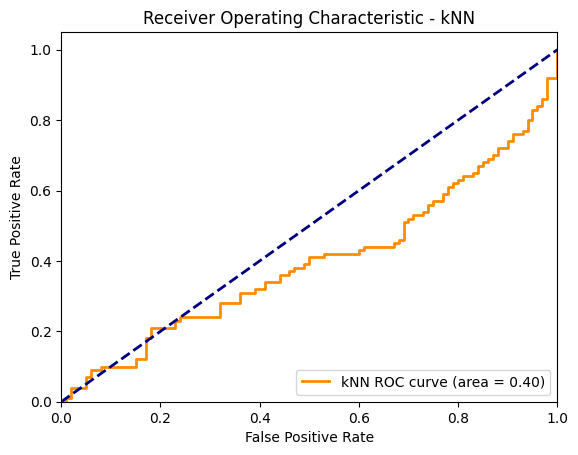

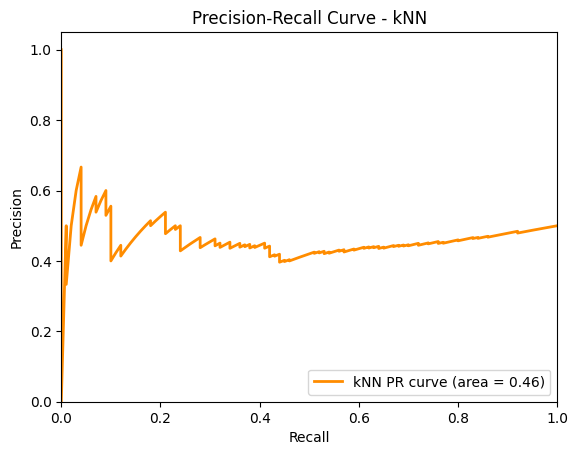

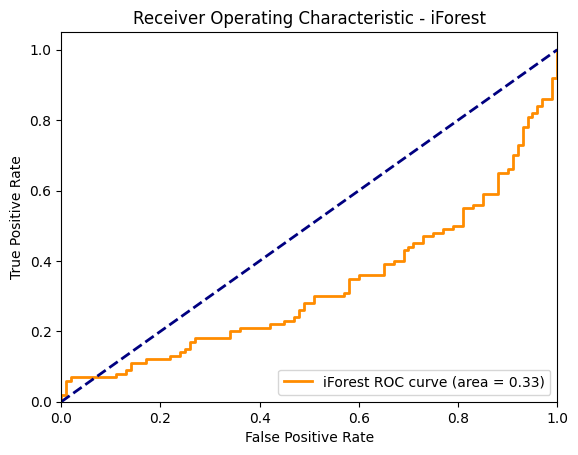

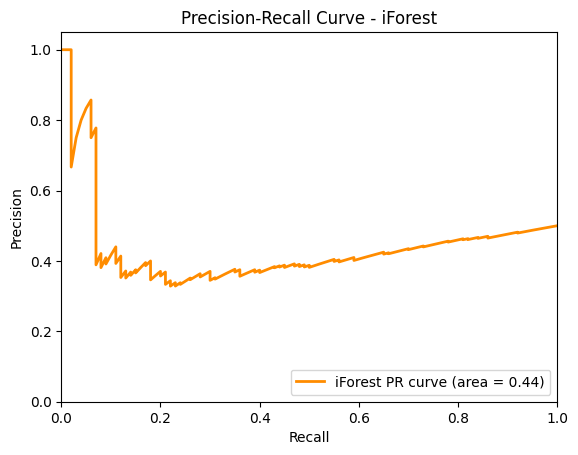

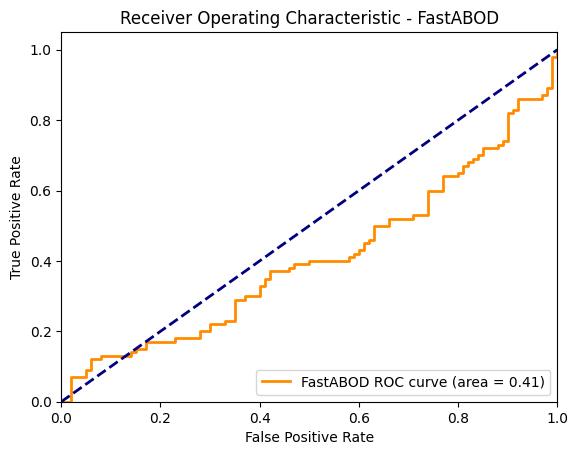

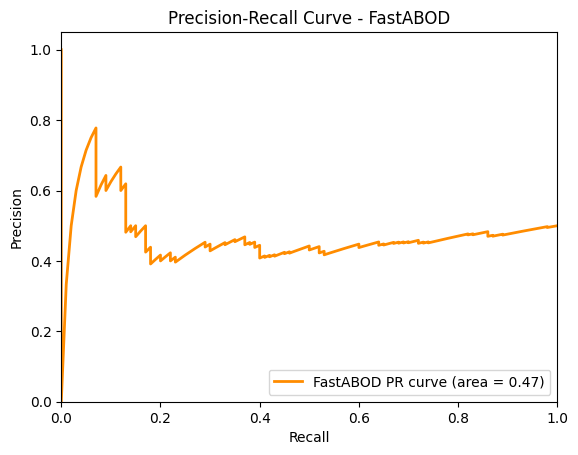

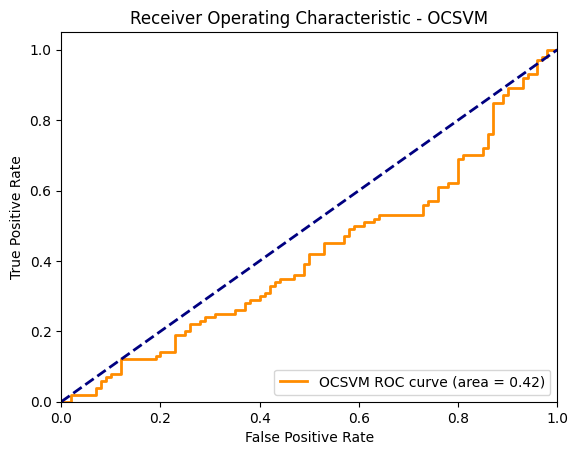

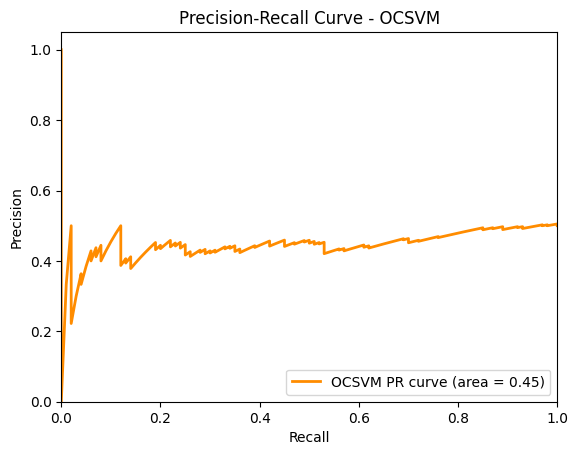

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.abod import ABOD
from pyod.models.ocsvm import OCSVM
from pyod.utils.data import evaluate_print
import matplotlib.pyplot as plt

# Ensure df_cleaned is defined and properly cleaned
# df_cleaned = ... (Load and clean your dataset here)

# Equalize the number of inliers and outliers
inliers = df_cleaned[df_cleaned['class'] == 0].sample(n=500, random_state=42)
outliers = df_cleaned[df_cleaned['class'] == 1].sample(n=500, random_state=42)

# Concatenate and shuffle the dataset
df_eq = pd.concat([inliers, outliers]).sample(frac=1, random_state=42)
X = df_eq.iloc[:, :-1]
y = df_eq.iloc[:, -1]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Custom Grid Search Function
def custom_grid_search_cv(model_class, param_grid, X_train, y_train):
    best_score = -np.inf
    best_params = None
    best_model = None
    
    for params in param_grid:
        try:
            model = model_class(**params)
            model.fit(X_train)
            y_train_scores = model.decision_scores_
            mean_score = roc_auc_score(y_train, y_train_scores)
            #scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
            #mean_score = scores.mean()
            print(f"Params: {params}, AUC-ROC: {mean_score}")
            if mean_score > best_score:
                best_score = mean_score
                best_params = params
                best_model = model
        except Exception as e:
            print(f"Error with params {params}: {e}")
    print(f"Best Params: {best_params}, Best AUC-ROC: {best_score}")
    return best_model

# Define parameter grids
knn_param_grid = [{'n_neighbors': k, 'contamination': c} for k in [5, 20, 50] for c in [0.5]]
iforest_param_grid = [{'n_estimators': n, 'contamination': c} for n in [50, 100, 200] for c in [0.5]]
fastabod_param_grid = [{'n_neighbors': k, 'contamination': c} for k in [5, 20] for c in [0.5]]
ocsvm_param_grid = [{'nu': n, 'kernel': k, 'gamma': g, 'contamination': c} for n in [0.1, 0.3] for k in ['linear', 'rbf'] for g in ['scale'] for c in [0.5]]

# Perform grid search for each model
best_knn = custom_grid_search_cv(KNN, knn_param_grid, X_train, y_train)
best_iforest = custom_grid_search_cv(IForest, iforest_param_grid, X_train, y_train)
best_fastabod = custom_grid_search_cv(ABOD, fastabod_param_grid, X_train, y_train)
best_ocsvm= custom_grid_search_cv(OCSVM, ocsvm_param_grid, X_train, y_train)

# Save model in a dictionary
best_models = {'KNN': best_knn, 'IForest': best_iforest, 'FastABOD': best_fastabod, 'OCSVM': best_ocsvm}

# Evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    if model:
        y_train_pred = model.labels_
        y_train_scores = model.decision_scores_
        y_test_pred = model.predict(X_test)
        y_test_scores = model.decision_function(X_test)

        print(f"\nOn Training Data ({model_name}):")
        evaluate_print(model_name, y_train, y_train_scores)
        print(f"\nOn Test Data ({model_name}):")
        evaluate_print(model_name, y_test, y_test_scores)
        precision, recall, _ = precision_recall_curve(y_test, y_test_scores)
        pr_auc = auc(recall, precision)
        print(f"PR AUC ({model_name}): ", pr_auc)
        return y_test_scores, model_name
    else:
        print(f"Model {model_name} could not be evaluated.")
        return None, model_name

# Train and evaluate models
y_test_scores_knn, _ = evaluate_model(best_knn, X_train, y_train, X_test, y_test, 'KNN')
y_test_scores_if, _ = evaluate_model(best_iforest, X_train, y_train, X_test, y_test, 'IForest')
y_test_scores_fabod, _ = evaluate_model(best_fastabod, X_train, y_train, X_test, y_test, 'FastABOD')
y_test_scores_ocsvm, _ = evaluate_model(best_ocsvm, X_train, y_train, X_test, y_test, 'OCSVM')

# Plot ROC and PR curves
def plot_roc_pr_curves(y_test, y_test_scores, model_name):
    if y_test_scores is not None:
        fpr, tpr, _ = roc_curve(y_test, y_test_scores)
        roc_auc = auc(fpr, tpr)
        precision, recall, _ = precision_recall_curve(y_test, y_test_scores)
        pr_auc = auc(recall, precision)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {model_name}')
        plt.legend(loc="lower right")
        plt.show()

        plt.figure()
        plt.plot(recall, precision, color='darkorange', lw=2, label=f'{model_name} PR curve (area = %0.2f)' % pr_auc)
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.show()

plot_roc_pr_curves(y_test, y_test_scores_knn, 'kNN')
plot_roc_pr_curves(y_test, y_test_scores_if, 'iForest')
plot_roc_pr_curves(y_test, y_test_scores_fabod, 'FastABOD')
plot_roc_pr_curves(y_test, y_test_scores_ocsvm, 'OCSVM')


Params: {'n_neighbors': 5, 'contamination': 0.5}, AUC-ROC: 0.34453124999999996
Params: {'n_neighbors': 20, 'contamination': 0.5}, AUC-ROC: 0.337275
Params: {'n_neighbors': 50, 'contamination': 0.5}, AUC-ROC: 0.3258875
Best Params: {'n_neighbors': 5, 'contamination': 0.5}, Best AUC-ROC: 0.34453124999999996
Params: {'n_estimators': 50, 'contamination': 0.5}, AUC-ROC: 0.26406874999999996
Params: {'n_estimators': 100, 'contamination': 0.5}, AUC-ROC: 0.25915625
Params: {'n_estimators': 200, 'contamination': 0.5}, AUC-ROC: 0.26396875
Best Params: {'n_estimators': 50, 'contamination': 0.5}, Best AUC-ROC: 0.26406874999999996
Params: {'n_neighbors': 5, 'contamination': 0.5}, AUC-ROC: 0.37370000000000003
Params: {'n_neighbors': 20, 'contamination': 0.5}, AUC-ROC: 0.34833749999999997
Best Params: {'n_neighbors': 5, 'contamination': 0.5}, Best AUC-ROC: 0.37370000000000003
Params: {'nu': 0.1, 'kernel': 'linear', 'gamma': 'scale', 'contamination': 0.5}, AUC-ROC: 0.5508062499999999
Params: {'nu': 0.1

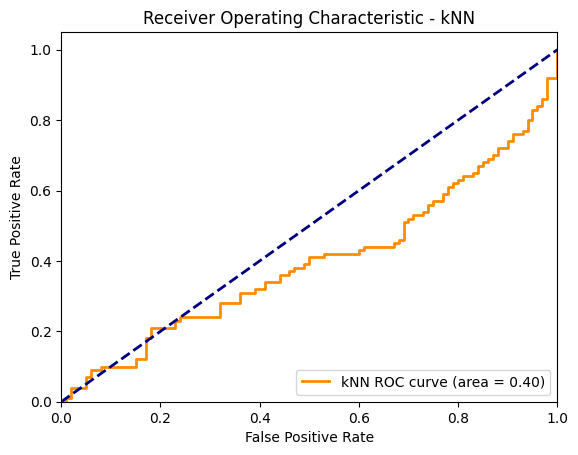

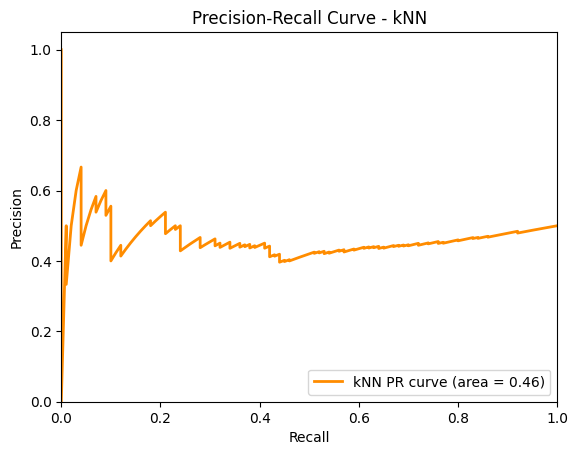

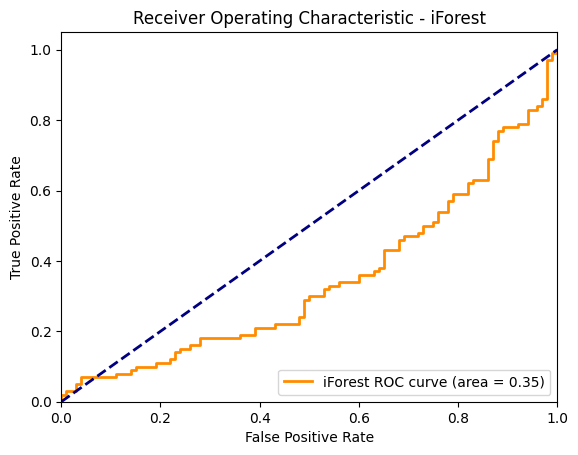

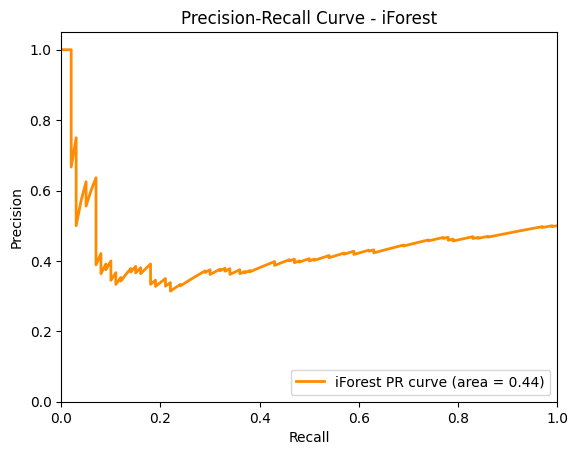

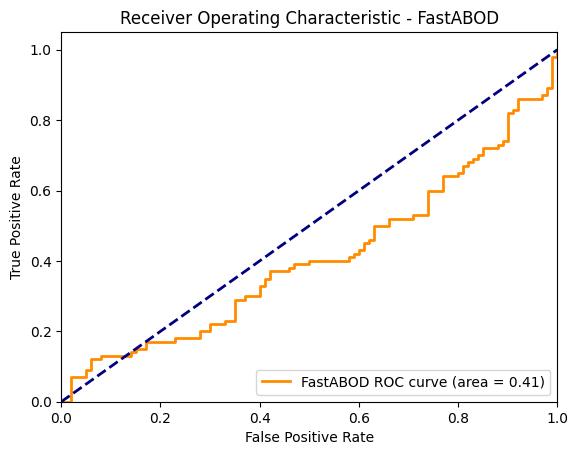

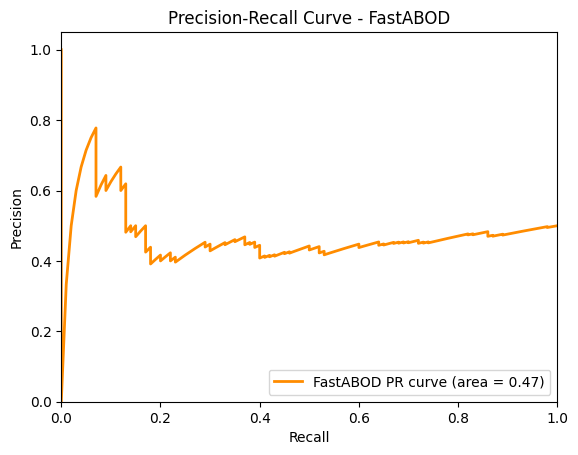

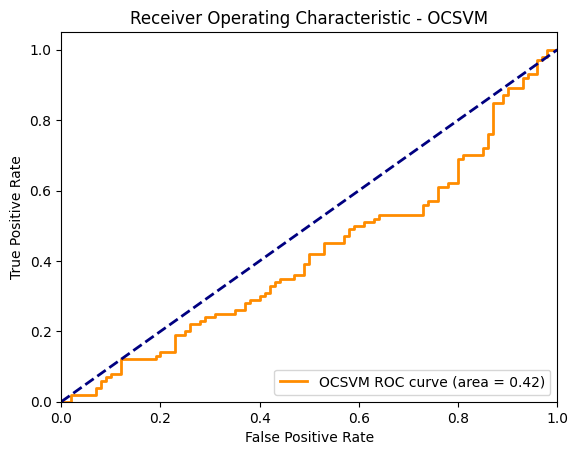

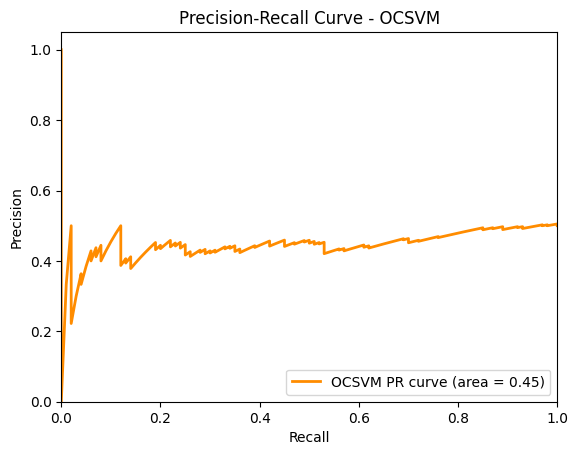

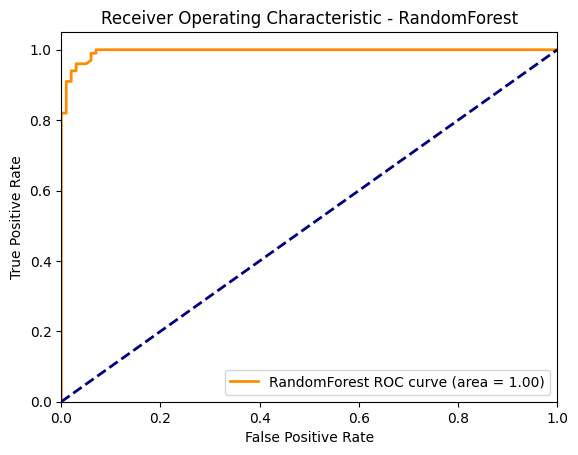

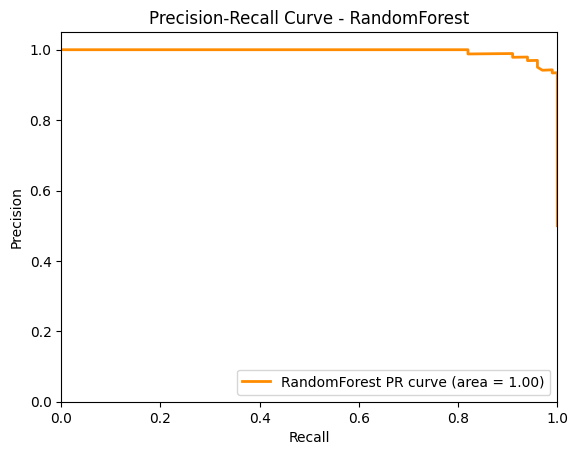

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.abod import ABOD
from pyod.models.ocsvm import OCSVM
from pyod.utils.data import evaluate_print
import matplotlib.pyplot as plt

# Equalize the number of inliers and outliers
inliers = df_cleaned[df_cleaned['class'] == 0].sample(n=500, random_state=42)
outliers = df_cleaned[df_cleaned['class'] == 1].sample(n=500, random_state=42)

# Concatenate and shuffle the dataset
df_eq = pd.concat([inliers, outliers]).sample(frac=1, random_state=42)
X = df_eq.iloc[:, :-1]
y = df_eq.iloc[:, -1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Custom Grid Search Function
def custom_grid_search_cv(model_class, param_grid, X_train, y_train):
    best_score = -np.inf
    best_params = None
    best_model = None
    
    for params in param_grid:
        try:
            model = model_class(**params)
            model.fit(X_train)
            y_train_scores = model.decision_scores_
            mean_score = roc_auc_score(y_train, y_train_scores)
            #scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
            #mean_score = scores.mean()
            print(f"Params: {params}, AUC-ROC: {mean_score}")
            if mean_score > best_score:
                best_score = mean_score
                best_params = params
                best_model = model
        except Exception as e:
            print(f"Error with params {params}: {e}")
    print(f"Best Params: {best_params}, Best AUC-ROC: {best_score}")
    return best_model

# Define parameter grids
knn_param_grid = [{'n_neighbors': k, 'contamination': c} for k in [5, 20, 50] for c in [0.5]]
iforest_param_grid = [{'n_estimators': n, 'contamination': c} for n in [50, 100, 200] for c in [0.5]]
fastabod_param_grid = [{'n_neighbors': k, 'contamination': c} for k in [5, 20] for c in [0.5]]
ocsvm_param_grid = [{'nu': n, 'kernel': k, 'gamma': g, 'contamination': c} for n in [0.1, 0.3] for k in ['linear', 'rbf'] for g in ['scale'] for c in [0.5]]

# Perform grid search for each model
best_knn = custom_grid_search_cv(KNN, knn_param_grid, X_train, y_train)
best_iforest = custom_grid_search_cv(IForest, iforest_param_grid, X_train, y_train)
best_fastabod = custom_grid_search_cv(ABOD, fastabod_param_grid, X_train, y_train)
best_ocsvm= custom_grid_search_cv(OCSVM, ocsvm_param_grid, X_train, y_train)

# Save models in a dictionary
best_models = {'KNN': best_knn, 'IForest': best_iforest, 'FastABOD': best_fastabod, 'OCSVM': best_ocsvm}

# RandomForest Classifier (Supervised)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, scoring='roc_auc', cv=5)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
print(f"Best Params for RandomForest: {grid_search_rf.best_params_}, Best AUC-ROC: {grid_search_rf.best_score_}")

best_models['RandomForest'] = best_rf

# Evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    if model:
        if model_name == 'RandomForest':
            y_train_pred = model.predict(X_train)
            y_train_scores = model.predict_proba(X_train)[:, 1]
            y_test_pred = model.predict(X_test)
            y_test_scores = model.predict_proba(X_test)[:, 1]
        else:
            y_train_pred = model.labels_
            y_train_scores = model.decision_scores_
            y_test_pred = model.predict(X_test)
            y_test_scores = model.decision_function(X_test)

        print(f"\nOn Training Data ({model_name}):")
        evaluate_print(model_name, y_train, y_train_scores)
        print(f"\nOn Test Data ({model_name}):")
        evaluate_print(model_name, y_test, y_test_scores)
        precision, recall, _ = precision_recall_curve(y_test, y_test_scores)
        pr_auc = auc(recall, precision)
        print(f"PR AUC ({model_name}): ", pr_auc)
        return y_test_scores, model_name
    else:
        print(f"Model {model_name} could not be evaluated.")
        return None, model_name

# Train and evaluate models
y_test_scores_knn, _ = evaluate_model(best_knn, X_train, y_train, X_test, y_test, 'KNN')
y_test_scores_if, _ = evaluate_model(best_iforest, X_train, y_train, X_test, y_test, 'IForest')
y_test_scores_fabod, _ = evaluate_model(best_fastabod, X_train, y_train, X_test, y_test, 'FastABOD')
y_test_scores_ocsvm, _ = evaluate_model(best_ocsvm, X_train, y_train, X_test, y_test, 'OCSVM')
y_test_scores_rf, _ = evaluate_model(best_rf, X_train, y_train, X_test, y_test, 'RandomForest')

# Plot ROC and PR curves
def plot_roc_pr_curves(y_test, y_test_scores, model_name):
    if y_test_scores is not None:
        fpr, tpr, _ = roc_curve(y_test, y_test_scores)
        roc_auc = auc(fpr, tpr)
        precision, recall, _ = precision_recall_curve(y_test, y_test_scores)
        pr_auc = auc(recall, precision)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {model_name}')
        plt.legend(loc="lower right")
        plt.show()

        plt.figure()
        plt.plot(recall, precision, color='darkorange', lw=2, label=f'{model_name} PR curve (area = %0.2f)' % pr_auc)
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.show()

plot_roc_pr_curves(y_test, y_test_scores_knn, 'kNN')
plot_roc_pr_curves(y_test, y_test_scores_if, 'iForest')
plot_roc_pr_curves(y_test, y_test_scores_fabod, 'FastABOD')
plot_roc_pr_curves(y_test, y_test_scores_ocsvm, 'OCSVM')
plot_roc_pr_curves(y_test, y_test_scores_rf, 'RandomForest')


## SUOD framework
currently not working as it cant find the module pyod.models.suod

In [23]:

from pyod.models.lof import LOF
from pyod.models.suod import SUOD
from pyod.models.iforest import IForest
from pyod.models.copod import COPOD
from pyod.utils.utility import standardizer
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

contamination = 0.5  # percentage of outliers

# Equalize the number of inliers and outliers
inliers = df_cleaned[df_cleaned['class'] == 0].sample(n=500, random_state=42)
outliers = df_cleaned[df_cleaned['class'] == 1].sample(n=500, random_state=42)

# Concatenate and shuffle the dataset
df_eq = pd.concat([inliers, outliers]).sample(frac=1, random_state=42)
X = df_eq.iloc[:, :-1]
y = df_eq.iloc[:, -1]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# train SUOD
clf_name = 'SUOD'

# initialized a group of outlier detectors for acceleration
detector_list = [LOF(n_neighbors=15), LOF(n_neighbors=20),
                    LOF(n_neighbors=25), LOF(n_neighbors=35),
                    COPOD(), IForest(n_estimators=100),
                    IForest(n_estimators=200)]

# decide the number of parallel process, and the combination method
clf = SUOD(base_estimators=detector_list, n_jobs=2, combination='average',
            verbose=False)

# or to use the default detectors
# clf = SUOD(n_jobs=2, combination='average',
#            verbose=False)
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

please install suod first for SUOD by `pip install suod`


ModuleNotFoundError: No module named 'suod'